In [1]:
# %load kerass_conv.py
%matplotlib inline
# matplotlib.use('Agg')
from __future__ import print_function
import matplotlib.pyplot as plt


import sys
import keras
# from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.datasets import fetch_mldata
import numpy as np




/home/harsh/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 1. 1. 1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(20, 10, 10, 1)


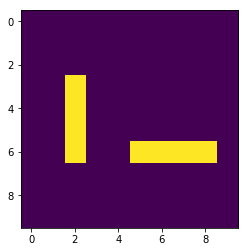

(20, 2)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
(20, 10, 10, 1)
(20, 2)


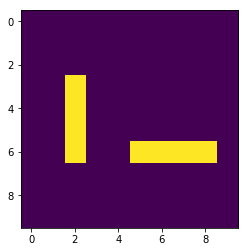

[0. 1.]


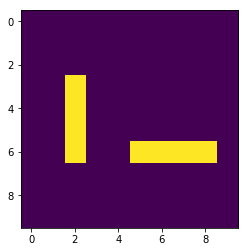

[0. 1.]


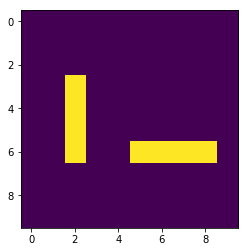

[0. 1.]


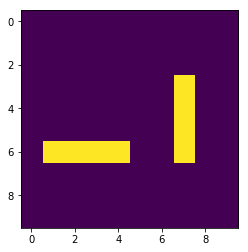

[1. 0.]


In [2]:

image1 = np.zeros((10,10))
image1[6,1]=1
image1[6,2]=1
image1[6,3]=1
image1[6,4]=1
image1[3,7]=1
image1[4,7]=1
image1[5,7]=1
image1[6,7]=1

print(image1)

image2 = np.zeros((10,10))
image2[6,5]=1
image2[6,6]=1
image2[6,7]=1
image2[6,8]=1
image2[3,2]=1
image2[4,2]=1
image2[5,2]=1
image2[6,2]=1
# print(image2)

temp1 = np.reshape(image1,(10,10,1))
temp2 = np.reshape(image2,(10,10,1))
x_train = np.array([temp1,temp1,temp1,temp1,temp1,temp1,temp1,temp1,temp1,temp1,temp2,temp2,temp2,temp2,temp2,temp2,temp2,temp2,temp2,temp2])
print(x_train.shape)
plt.imshow(x_train[12,:,:,0])
plt.show()

y_train = np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1])
y_train = keras.utils.to_categorical(y_train, 2)
print(y_train.shape)
print(y_train)

shuffle_index = np.random.permutation(20)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

print(x_train.shape)
print(y_train.shape)

plt.imshow(x_train[0,:,:,0])
plt.show()
print(y_train[0])
plt.imshow(x_train[1,:,:,0])
plt.show()
print(y_train[1])
plt.imshow(x_train[2,:,:,0])
plt.show()
print(y_train[2])
plt.imshow(x_train[3,:,:,0])
plt.show()
print(y_train[3])

In [3]:
batch_size = 10
num_classes = 2
epochs = 10000

model = Sequential()
model.add(Conv2D(2, kernel_size=(4, 4),
                 activation='relu',
                 input_shape=(10,10,1),
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(2, (4, 4), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(4, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
learning_rate = 0.001
# opt = keras.optimizers.Adadelta(lr=learning_rate, rho=0.95, epsilon=None, decay=0.0)
opt = keras.optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=opt,
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_train, y_train))
# score = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])


Train on 20 samples, validate on 20 samples
Epoch 1/10000
20/20 [==============================] - 0s 11ms/step - loss: 0.6762 - acc: 1.0000 - val_loss: 0.6731 - val_acc: 1.0000
Epoch 2/10000
20/20 [==============================] - 0s 553us/step - loss: 0.6722 - acc: 1.0000 - val_loss: 0.6693 - val_acc: 1.0000
Epoch 3/10000
20/20 [==============================] - 0s 916us/step - loss: 0.6683 - acc: 1.0000 - val_loss: 0.6653 - val_acc: 1.0000
Epoch 4/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.6644 - acc: 1.0000 - val_loss: 0.6617 - val_acc: 1.0000
Epoch 5/10000
20/20 [==============================] - 0s 632us/step - loss: 0.6613 - acc: 1.0000 - val_loss: 0.6600 - val_acc: 1.0000
Epoch 6/10000
20/20 [==============================] - 0s 935us/step - loss: 0.6595 - acc: 1.0000 - val_loss: 0.6573 - val_acc: 1.0000
Epoch 7/10000
20/20 [==============================] - 0s 838us/step - loss: 0.6567 - acc: 1.0000 - val_loss: 0.6542 - val_acc: 1.0000
Epoch 8/10000


20/20 [==============================] - 0s 689us/step - loss: 0.2969 - acc: 1.0000 - val_loss: 0.2891 - val_acc: 1.0000
Epoch 62/10000
20/20 [==============================] - 0s 853us/step - loss: 0.2864 - acc: 1.0000 - val_loss: 0.2785 - val_acc: 1.0000
Epoch 63/10000
20/20 [==============================] - 0s 984us/step - loss: 0.2758 - acc: 1.0000 - val_loss: 0.2681 - val_acc: 1.0000
Epoch 64/10000
20/20 [==============================] - 0s 794us/step - loss: 0.2653 - acc: 1.0000 - val_loss: 0.2578 - val_acc: 1.0000
Epoch 65/10000
20/20 [==============================] - 0s 795us/step - loss: 0.2554 - acc: 1.0000 - val_loss: 0.2477 - val_acc: 1.0000
Epoch 66/10000
20/20 [==============================] - 0s 824us/step - loss: 0.2452 - acc: 1.0000 - val_loss: 0.2378 - val_acc: 1.0000
Epoch 67/10000
20/20 [==============================] - 0s 825us/step - loss: 0.2353 - acc: 1.0000 - val_loss: 0.2279 - val_acc: 1.0000
Epoch 68/10000
20/20 [==============================] - 0s 969u

20/20 [==============================] - 0s 1ms/step - loss: 0.0202 - acc: 1.0000 - val_loss: 0.0197 - val_acc: 1.0000
Epoch 122/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.0195 - acc: 1.0000 - val_loss: 0.0191 - val_acc: 1.0000
Epoch 123/10000
20/20 [==============================] - 0s 761us/step - loss: 0.0190 - acc: 1.0000 - val_loss: 0.0185 - val_acc: 1.0000
Epoch 124/10000
20/20 [==============================] - 0s 854us/step - loss: 0.0184 - acc: 1.0000 - val_loss: 0.0180 - val_acc: 1.0000
Epoch 125/10000
20/20 [==============================] - 0s 746us/step - loss: 0.0179 - acc: 1.0000 - val_loss: 0.0175 - val_acc: 1.0000
Epoch 126/10000
20/20 [==============================] - 0s 802us/step - loss: 0.0174 - acc: 1.0000 - val_loss: 0.0170 - val_acc: 1.0000
Epoch 127/10000
20/20 [==============================] - 0s 804us/step - loss: 0.0169 - acc: 1.0000 - val_loss: 0.0165 - val_acc: 1.0000
Epoch 128/10000
20/20 [==============================] - 0s 1

20/20 [==============================] - 0s 560us/step - loss: 0.0055 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 1.0000
Epoch 182/10000
20/20 [==============================] - 0s 801us/step - loss: 0.0054 - acc: 1.0000 - val_loss: 0.0054 - val_acc: 1.0000
Epoch 183/10000
20/20 [==============================] - 0s 885us/step - loss: 0.0054 - acc: 1.0000 - val_loss: 0.0053 - val_acc: 1.0000
Epoch 184/10000
20/20 [==============================] - 0s 647us/step - loss: 0.0053 - acc: 1.0000 - val_loss: 0.0052 - val_acc: 1.0000
Epoch 185/10000
20/20 [==============================] - 0s 768us/step - loss: 0.0052 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 1.0000
Epoch 186/10000
20/20 [==============================] - 0s 555us/step - loss: 0.0051 - acc: 1.0000 - val_loss: 0.0051 - val_acc: 1.0000
Epoch 187/10000
20/20 [==============================] - 0s 663us/step - loss: 0.0050 - acc: 1.0000 - val_loss: 0.0050 - val_acc: 1.0000
Epoch 188/10000
20/20 [==============================] - 

Epoch 241/10000
20/20 [==============================] - 0s 572us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.0026 - val_acc: 1.0000
Epoch 242/10000
20/20 [==============================] - 0s 924us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000
Epoch 243/10000
20/20 [==============================] - 0s 677us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000
Epoch 244/10000
20/20 [==============================] - 0s 763us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000
Epoch 245/10000
20/20 [==============================] - 0s 742us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 1.0000
Epoch 246/10000
20/20 [==============================] - 0s 709us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 247/10000
20/20 [==============================] - 0s 668us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0024 - val_acc: 1.0000
Epoch 248/10000
20/20 [==================

Epoch 301/10000
20/20 [==============================] - 0s 751us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 302/10000
20/20 [==============================] - 0s 615us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 303/10000
20/20 [==============================] - 0s 612us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 304/10000
20/20 [==============================] - 0s 754us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 305/10000
20/20 [==============================] - 0s 882us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 306/10000
20/20 [==============================] - 0s 681us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 307/10000
20/20 [==============================] - 0s 735us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 308/10000
20/20 [==================

Epoch 361/10000
20/20 [==============================] - 0s 723us/step - loss: 9.8507e-04 - acc: 1.0000 - val_loss: 9.8038e-04 - val_acc: 1.0000
Epoch 362/10000
20/20 [==============================] - 0s 710us/step - loss: 9.7883e-04 - acc: 1.0000 - val_loss: 9.7421e-04 - val_acc: 1.0000
Epoch 363/10000
20/20 [==============================] - 0s 864us/step - loss: 9.7260e-04 - acc: 1.0000 - val_loss: 9.6785e-04 - val_acc: 1.0000
Epoch 364/10000
20/20 [==============================] - 0s 719us/step - loss: 9.6638e-04 - acc: 1.0000 - val_loss: 9.6183e-04 - val_acc: 1.0000
Epoch 365/10000
20/20 [==============================] - 0s 899us/step - loss: 9.6035e-04 - acc: 1.0000 - val_loss: 9.5583e-04 - val_acc: 1.0000
Epoch 366/10000
20/20 [==============================] - 0s 786us/step - loss: 9.5440e-04 - acc: 1.0000 - val_loss: 9.4989e-04 - val_acc: 1.0000
Epoch 367/10000
20/20 [==============================] - 0s 760us/step - loss: 9.4841e-04 - acc: 1.0000 - val_loss: 9.4399e-04 - v

20/20 [==============================] - 0s 533us/step - loss: 7.0954e-04 - acc: 1.0000 - val_loss: 7.0668e-04 - val_acc: 1.0000
Epoch 418/10000
20/20 [==============================] - 0s 641us/step - loss: 7.0579e-04 - acc: 1.0000 - val_loss: 7.0296e-04 - val_acc: 1.0000
Epoch 419/10000
20/20 [==============================] - 0s 556us/step - loss: 7.0200e-04 - acc: 1.0000 - val_loss: 6.9920e-04 - val_acc: 1.0000
Epoch 420/10000
20/20 [==============================] - 0s 806us/step - loss: 6.9827e-04 - acc: 1.0000 - val_loss: 6.9550e-04 - val_acc: 1.0000
Epoch 421/10000
20/20 [==============================] - 0s 591us/step - loss: 6.9465e-04 - acc: 1.0000 - val_loss: 6.9192e-04 - val_acc: 1.0000
Epoch 422/10000
20/20 [==============================] - 0s 749us/step - loss: 6.9108e-04 - acc: 1.0000 - val_loss: 6.8819e-04 - val_acc: 1.0000
Epoch 423/10000
20/20 [==============================] - 0s 684us/step - loss: 6.8734e-04 - acc: 1.0000 - val_loss: 6.8464e-04 - val_acc: 1.0000
E

Epoch 474/10000
20/20 [==============================] - 0s 966us/step - loss: 5.3365e-04 - acc: 1.0000 - val_loss: 5.3179e-04 - val_acc: 1.0000
Epoch 475/10000
20/20 [==============================] - 0s 700us/step - loss: 5.3117e-04 - acc: 1.0000 - val_loss: 5.2925e-04 - val_acc: 1.0000
Epoch 476/10000
20/20 [==============================] - 0s 790us/step - loss: 5.2865e-04 - acc: 1.0000 - val_loss: 5.2687e-04 - val_acc: 1.0000
Epoch 477/10000
20/20 [==============================] - 0s 766us/step - loss: 5.2627e-04 - acc: 1.0000 - val_loss: 5.2439e-04 - val_acc: 1.0000
Epoch 478/10000
20/20 [==============================] - 0s 621us/step - loss: 5.2386e-04 - acc: 1.0000 - val_loss: 5.2200e-04 - val_acc: 1.0000
Epoch 479/10000
20/20 [==============================] - 0s 778us/step - loss: 5.2144e-04 - acc: 1.0000 - val_loss: 5.1959e-04 - val_acc: 1.0000
Epoch 480/10000
20/20 [==============================] - ETA: 0s - loss: 5.1234e-04 - acc: 1.000 - 0s 899us/step - loss: 5.1901e-0

20/20 [==============================] - 0s 839us/step - loss: 4.1656e-04 - acc: 1.0000 - val_loss: 4.1523e-04 - val_acc: 1.0000
Epoch 531/10000
20/20 [==============================] - 0s 815us/step - loss: 4.1480e-04 - acc: 1.0000 - val_loss: 4.1350e-04 - val_acc: 1.0000
Epoch 532/10000
20/20 [==============================] - 0s 582us/step - loss: 4.1309e-04 - acc: 1.0000 - val_loss: 4.1180e-04 - val_acc: 1.0000
Epoch 533/10000
20/20 [==============================] - 0s 803us/step - loss: 4.1140e-04 - acc: 1.0000 - val_loss: 4.1007e-04 - val_acc: 1.0000
Epoch 534/10000
20/20 [==============================] - 0s 742us/step - loss: 4.0963e-04 - acc: 1.0000 - val_loss: 4.0838e-04 - val_acc: 1.0000
Epoch 535/10000
20/20 [==============================] - 0s 798us/step - loss: 4.0793e-04 - acc: 1.0000 - val_loss: 4.0665e-04 - val_acc: 1.0000
Epoch 536/10000
20/20 [==============================] - 0s 741us/step - loss: 4.0626e-04 - acc: 1.0000 - val_loss: 4.0501e-04 - val_acc: 1.0000
E

20/20 [==============================] - 0s 937us/step - loss: 3.3269e-04 - acc: 1.0000 - val_loss: 3.3164e-04 - val_acc: 1.0000
Epoch 587/10000
20/20 [==============================] - 0s 760us/step - loss: 3.3131e-04 - acc: 1.0000 - val_loss: 3.3032e-04 - val_acc: 1.0000
Epoch 588/10000
20/20 [==============================] - 0s 655us/step - loss: 3.3001e-04 - acc: 1.0000 - val_loss: 3.2901e-04 - val_acc: 1.0000
Epoch 589/10000
20/20 [==============================] - 0s 707us/step - loss: 3.2874e-04 - acc: 1.0000 - val_loss: 3.2770e-04 - val_acc: 1.0000
Epoch 590/10000
20/20 [==============================] - 0s 901us/step - loss: 3.2739e-04 - acc: 1.0000 - val_loss: 3.2645e-04 - val_acc: 1.0000
Epoch 591/10000
20/20 [==============================] - 0s 867us/step - loss: 3.2614e-04 - acc: 1.0000 - val_loss: 3.2520e-04 - val_acc: 1.0000
Epoch 592/10000
20/20 [==============================] - 0s 1ms/step - loss: 3.2487e-04 - acc: 1.0000 - val_loss: 3.2394e-04 - val_acc: 1.0000
Epo

20/20 [==============================] - 0s 567us/step - loss: 2.6951e-04 - acc: 1.0000 - val_loss: 2.6879e-04 - val_acc: 1.0000
Epoch 643/10000
20/20 [==============================] - 0s 980us/step - loss: 2.6854e-04 - acc: 1.0000 - val_loss: 2.6781e-04 - val_acc: 1.0000
Epoch 644/10000
20/20 [==============================] - 0s 565us/step - loss: 2.6760e-04 - acc: 1.0000 - val_loss: 2.6689e-04 - val_acc: 1.0000
Epoch 645/10000
20/20 [==============================] - 0s 819us/step - loss: 2.6664e-04 - acc: 1.0000 - val_loss: 2.6590e-04 - val_acc: 1.0000
Epoch 646/10000
20/20 [==============================] - 0s 628us/step - loss: 2.6566e-04 - acc: 1.0000 - val_loss: 2.6498e-04 - val_acc: 1.0000
Epoch 647/10000
20/20 [==============================] - 0s 798us/step - loss: 2.6476e-04 - acc: 1.0000 - val_loss: 2.6402e-04 - val_acc: 1.0000
Epoch 648/10000
20/20 [==============================] - 0s 741us/step - loss: 2.6379e-04 - acc: 1.0000 - val_loss: 2.6313e-04 - val_acc: 1.0000
E

Epoch 699/10000
20/20 [==============================] - 0s 883us/step - loss: 2.2180e-04 - acc: 1.0000 - val_loss: 2.2125e-04 - val_acc: 1.0000
Epoch 700/10000
20/20 [==============================] - 0s 794us/step - loss: 2.2109e-04 - acc: 1.0000 - val_loss: 2.2056e-04 - val_acc: 1.0000
Epoch 701/10000
20/20 [==============================] - 0s 776us/step - loss: 2.2036e-04 - acc: 1.0000 - val_loss: 2.1985e-04 - val_acc: 1.0000
Epoch 702/10000
20/20 [==============================] - 0s 791us/step - loss: 2.1964e-04 - acc: 1.0000 - val_loss: 2.1910e-04 - val_acc: 1.0000
Epoch 703/10000
20/20 [==============================] - 0s 1ms/step - loss: 2.1893e-04 - acc: 1.0000 - val_loss: 2.1836e-04 - val_acc: 1.0000
Epoch 704/10000
20/20 [==============================] - 0s 1ms/step - loss: 2.1818e-04 - acc: 1.0000 - val_loss: 2.1770e-04 - val_acc: 1.0000
Epoch 705/10000
20/20 [==============================] - 0s 722us/step - loss: 2.1751e-04 - acc: 1.0000 - val_loss: 2.1698e-04 - val_a

20/20 [==============================] - 0s 573us/step - loss: 1.8585e-04 - acc: 1.0000 - val_loss: 1.8539e-04 - val_acc: 1.0000
Epoch 756/10000
20/20 [==============================] - 0s 649us/step - loss: 1.8525e-04 - acc: 1.0000 - val_loss: 1.8479e-04 - val_acc: 1.0000
Epoch 757/10000
20/20 [==============================] - 0s 667us/step - loss: 1.8466e-04 - acc: 1.0000 - val_loss: 1.8425e-04 - val_acc: 1.0000
Epoch 758/10000
20/20 [==============================] - 0s 990us/step - loss: 1.8414e-04 - acc: 1.0000 - val_loss: 1.8372e-04 - val_acc: 1.0000
Epoch 759/10000
20/20 [==============================] - 0s 717us/step - loss: 1.8360e-04 - acc: 1.0000 - val_loss: 1.8312e-04 - val_acc: 1.0000
Epoch 760/10000
20/20 [==============================] - 0s 672us/step - loss: 1.8300e-04 - acc: 1.0000 - val_loss: 1.8259e-04 - val_acc: 1.0000
Epoch 761/10000
20/20 [==============================] - 0s 639us/step - loss: 1.8247e-04 - acc: 1.0000 - val_loss: 1.8205e-04 - val_acc: 1.0000
E

Epoch 812/10000
20/20 [==============================] - 0s 576us/step - loss: 1.5707e-04 - acc: 1.0000 - val_loss: 1.5674e-04 - val_acc: 1.0000
Epoch 813/10000
20/20 [==============================] - 0s 701us/step - loss: 1.5664e-04 - acc: 1.0000 - val_loss: 1.5630e-04 - val_acc: 1.0000
Epoch 814/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.5618e-04 - acc: 1.0000 - val_loss: 1.5585e-04 - val_acc: 1.0000
Epoch 815/10000
20/20 [==============================] - 0s 796us/step - loss: 1.5575e-04 - acc: 1.0000 - val_loss: 1.5543e-04 - val_acc: 1.0000
Epoch 816/10000
20/20 [==============================] - 0s 831us/step - loss: 1.5531e-04 - acc: 1.0000 - val_loss: 1.5495e-04 - val_acc: 1.0000
Epoch 817/10000
20/20 [==============================] - 0s 777us/step - loss: 1.5485e-04 - acc: 1.0000 - val_loss: 1.5451e-04 - val_acc: 1.0000
Epoch 818/10000
20/20 [==============================] - 0s 836us/step - loss: 1.5440e-04 - acc: 1.0000 - val_loss: 1.5406e-04 - val

20/20 [==============================] - 0s 601us/step - loss: 1.3452e-04 - acc: 1.0000 - val_loss: 1.3424e-04 - val_acc: 1.0000
Epoch 869/10000
20/20 [==============================] - 0s 827us/step - loss: 1.3415e-04 - acc: 1.0000 - val_loss: 1.3388e-04 - val_acc: 1.0000
Epoch 870/10000
20/20 [==============================] - 0s 651us/step - loss: 1.3379e-04 - acc: 1.0000 - val_loss: 1.3352e-04 - val_acc: 1.0000
Epoch 871/10000
20/20 [==============================] - 0s 655us/step - loss: 1.3343e-04 - acc: 1.0000 - val_loss: 1.3317e-04 - val_acc: 1.0000
Epoch 872/10000
20/20 [==============================] - 0s 735us/step - loss: 1.3308e-04 - acc: 1.0000 - val_loss: 1.3281e-04 - val_acc: 1.0000
Epoch 873/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.3272e-04 - acc: 1.0000 - val_loss: 1.3245e-04 - val_acc: 1.0000
Epoch 874/10000
20/20 [==============================] - 0s 816us/step - loss: 1.3236e-04 - acc: 1.0000 - val_loss: 1.3209e-04 - val_acc: 1.0000
Epo

Epoch 925/10000
20/20 [==============================] - 0s 660us/step - loss: 1.1591e-04 - acc: 1.0000 - val_loss: 1.1567e-04 - val_acc: 1.0000
Epoch 926/10000
20/20 [==============================] - 0s 765us/step - loss: 1.1559e-04 - acc: 1.0000 - val_loss: 1.1537e-04 - val_acc: 1.0000
Epoch 927/10000
20/20 [==============================] - 0s 555us/step - loss: 1.1530e-04 - acc: 1.0000 - val_loss: 1.1510e-04 - val_acc: 1.0000
Epoch 928/10000
20/20 [==============================] - 0s 924us/step - loss: 1.1503e-04 - acc: 1.0000 - val_loss: 1.1481e-04 - val_acc: 1.0000
Epoch 929/10000
20/20 [==============================] - 0s 834us/step - loss: 1.1472e-04 - acc: 1.0000 - val_loss: 1.1451e-04 - val_acc: 1.0000
Epoch 930/10000
20/20 [==============================] - 0s 842us/step - loss: 1.1443e-04 - acc: 1.0000 - val_loss: 1.1421e-04 - val_acc: 1.0000
Epoch 931/10000
20/20 [==============================] - 0s 782us/step - loss: 1.1413e-04 - acc: 1.0000 - val_loss: 1.1391e-04 - v

20/20 [==============================] - 0s 640us/step - loss: 1.0089e-04 - acc: 1.0000 - val_loss: 1.0071e-04 - val_acc: 1.0000
Epoch 982/10000
20/20 [==============================] - 0s 602us/step - loss: 1.0065e-04 - acc: 1.0000 - val_loss: 1.0044e-04 - val_acc: 1.0000
Epoch 983/10000
20/20 [==============================] - 0s 999us/step - loss: 1.0038e-04 - acc: 1.0000 - val_loss: 1.0020e-04 - val_acc: 1.0000
Epoch 984/10000
20/20 [==============================] - 0s 605us/step - loss: 1.0016e-04 - acc: 1.0000 - val_loss: 9.9962e-05 - val_acc: 1.0000
Epoch 985/10000
20/20 [==============================] - 0s 950us/step - loss: 9.9902e-05 - acc: 1.0000 - val_loss: 9.9724e-05 - val_acc: 1.0000
Epoch 986/10000
20/20 [==============================] - 0s 874us/step - loss: 9.9664e-05 - acc: 1.0000 - val_loss: 9.9485e-05 - val_acc: 1.0000
Epoch 987/10000
20/20 [==============================] - 0s 696us/step - loss: 9.9431e-05 - acc: 1.0000 - val_loss: 9.9247e-05 - val_acc: 1.0000
E

20/20 [==============================] - 0s 685us/step - loss: 8.8359e-05 - acc: 1.0000 - val_loss: 8.8219e-05 - val_acc: 1.0000
Epoch 1038/10000
20/20 [==============================] - 0s 609us/step - loss: 8.8180e-05 - acc: 1.0000 - val_loss: 8.8010e-05 - val_acc: 1.0000
Epoch 1039/10000
20/20 [==============================] - 0s 779us/step - loss: 8.7951e-05 - acc: 1.0000 - val_loss: 8.7831e-05 - val_acc: 1.0000
Epoch 1040/10000
20/20 [==============================] - 0s 899us/step - loss: 8.7772e-05 - acc: 1.0000 - val_loss: 8.7623e-05 - val_acc: 1.0000
Epoch 1041/10000
20/20 [==============================] - 0s 855us/step - loss: 8.7563e-05 - acc: 1.0000 - val_loss: 8.7414e-05 - val_acc: 1.0000
Epoch 1042/10000
20/20 [==============================] - 0s 584us/step - loss: 8.7354e-05 - acc: 1.0000 - val_loss: 8.7205e-05 - val_acc: 1.0000
Epoch 1043/10000
20/20 [==============================] - 0s 601us/step - loss: 8.7164e-05 - acc: 1.0000 - val_loss: 8.7027e-05 - val_acc: 1.

20/20 [==============================] - 0s 781us/step - loss: 7.7847e-05 - acc: 1.0000 - val_loss: 7.7727e-05 - val_acc: 1.0000
Epoch 1094/10000
20/20 [==============================] - 0s 940us/step - loss: 7.7692e-05 - acc: 1.0000 - val_loss: 7.7549e-05 - val_acc: 1.0000
Epoch 1095/10000
20/20 [==============================] - 0s 591us/step - loss: 7.7507e-05 - acc: 1.0000 - val_loss: 7.7400e-05 - val_acc: 1.0000
Epoch 1096/10000
20/20 [==============================] - 0s 572us/step - loss: 7.7358e-05 - acc: 1.0000 - val_loss: 7.7191e-05 - val_acc: 1.0000
Epoch 1097/10000
20/20 [==============================] - 0s 563us/step - loss: 7.7161e-05 - acc: 1.0000 - val_loss: 7.7042e-05 - val_acc: 1.0000
Epoch 1098/10000
20/20 [==============================] - 0s 816us/step - loss: 7.6997e-05 - acc: 1.0000 - val_loss: 7.6893e-05 - val_acc: 1.0000
Epoch 1099/10000
20/20 [==============================] - 0s 905us/step - loss: 7.6851e-05 - acc: 1.0000 - val_loss: 7.6714e-05 - val_acc: 1.

20/20 [==============================] - 0s 544us/step - loss: 6.8950e-05 - acc: 1.0000 - val_loss: 6.8816e-05 - val_acc: 1.0000
Epoch 1150/10000
20/20 [==============================] - 0s 732us/step - loss: 6.8804e-05 - acc: 1.0000 - val_loss: 6.8667e-05 - val_acc: 1.0000
Epoch 1151/10000
20/20 [==============================] - 0s 578us/step - loss: 6.8661e-05 - acc: 1.0000 - val_loss: 6.8548e-05 - val_acc: 1.0000
Epoch 1152/10000
20/20 [==============================] - 0s 793us/step - loss: 6.8503e-05 - acc: 1.0000 - val_loss: 6.8428e-05 - val_acc: 1.0000
Epoch 1153/10000
20/20 [==============================] - 0s 743us/step - loss: 6.8369e-05 - acc: 1.0000 - val_loss: 6.8250e-05 - val_acc: 1.0000
Epoch 1154/10000
20/20 [==============================] - 0s 1ms/step - loss: 6.8220e-05 - acc: 1.0000 - val_loss: 6.8071e-05 - val_acc: 1.0000
Epoch 1155/10000
20/20 [==============================] - 0s 798us/step - loss: 6.8071e-05 - acc: 1.0000 - val_loss: 6.7952e-05 - val_acc: 1.00

20/20 [==============================] - 0s 970us/step - loss: 6.1335e-05 - acc: 1.0000 - val_loss: 6.1246e-05 - val_acc: 1.0000
Epoch 1206/10000
20/20 [==============================] - 0s 709us/step - loss: 6.1216e-05 - acc: 1.0000 - val_loss: 6.1126e-05 - val_acc: 1.0000
Epoch 1207/10000
20/20 [==============================] - 0s 904us/step - loss: 6.1079e-05 - acc: 1.0000 - val_loss: 6.1007e-05 - val_acc: 1.0000
Epoch 1208/10000
20/20 [==============================] - 0s 637us/step - loss: 6.0957e-05 - acc: 1.0000 - val_loss: 6.0858e-05 - val_acc: 1.0000
Epoch 1209/10000
20/20 [==============================] - 0s 826us/step - loss: 6.0828e-05 - acc: 1.0000 - val_loss: 6.0739e-05 - val_acc: 1.0000
Epoch 1210/10000
20/20 [==============================] - 0s 831us/step - loss: 6.0709e-05 - acc: 1.0000 - val_loss: 6.0620e-05 - val_acc: 1.0000
Epoch 1211/10000
20/20 [==============================] - 0s 1ms/step - loss: 6.0590e-05 - acc: 1.0000 - val_loss: 6.0501e-05 - val_acc: 1.00

20/20 [==============================] - 0s 940us/step - loss: 5.4778e-05 - acc: 1.0000 - val_loss: 5.4689e-05 - val_acc: 1.0000
Epoch 1262/10000
20/20 [==============================] - 0s 838us/step - loss: 5.4671e-05 - acc: 1.0000 - val_loss: 5.4599e-05 - val_acc: 1.0000
Epoch 1263/10000
20/20 [==============================] - 0s 637us/step - loss: 5.4570e-05 - acc: 1.0000 - val_loss: 5.4510e-05 - val_acc: 1.0000
Epoch 1264/10000
20/20 [==============================] - 0s 572us/step - loss: 5.4459e-05 - acc: 1.0000 - val_loss: 5.4391e-05 - val_acc: 1.0000
Epoch 1265/10000
20/20 [==============================] - 0s 666us/step - loss: 5.4361e-05 - acc: 1.0000 - val_loss: 5.4272e-05 - val_acc: 1.0000
Epoch 1266/10000
20/20 [==============================] - 0s 1ms/step - loss: 5.4242e-05 - acc: 1.0000 - val_loss: 5.4152e-05 - val_acc: 1.0000
Epoch 1267/10000
20/20 [==============================] - 0s 1ms/step - loss: 5.4122e-05 - acc: 1.0000 - val_loss: 5.4063e-05 - val_acc: 1.0000

20/20 [==============================] - 0s 928us/step - loss: 4.9115e-05 - acc: 1.0000 - val_loss: 4.9026e-05 - val_acc: 1.0000
Epoch 1318/10000
20/20 [==============================] - 0s 840us/step - loss: 4.9011e-05 - acc: 1.0000 - val_loss: 4.8966e-05 - val_acc: 1.0000
Epoch 1319/10000
20/20 [==============================] - 0s 741us/step - loss: 4.8919e-05 - acc: 1.0000 - val_loss: 4.8877e-05 - val_acc: 1.0000
Epoch 1320/10000
20/20 [==============================] - 0s 853us/step - loss: 4.8829e-05 - acc: 1.0000 - val_loss: 4.8758e-05 - val_acc: 1.0000
Epoch 1321/10000
20/20 [==============================] - 0s 1ms/step - loss: 4.8737e-05 - acc: 1.0000 - val_loss: 4.8668e-05 - val_acc: 1.0000
Epoch 1322/10000
20/20 [==============================] - 0s 1ms/step - loss: 4.8653e-05 - acc: 1.0000 - val_loss: 4.8549e-05 - val_acc: 1.0000
Epoch 1323/10000
20/20 [==============================] - 0s 1ms/step - loss: 4.8540e-05 - acc: 1.0000 - val_loss: 4.8490e-05 - val_acc: 1.0000
E

20/20 [==============================] - 0s 1ms/step - loss: 4.4180e-05 - acc: 1.0000 - val_loss: 4.4108e-05 - val_acc: 1.0000
Epoch 1374/10000
20/20 [==============================] - 0s 604us/step - loss: 4.4091e-05 - acc: 1.0000 - val_loss: 4.4049e-05 - val_acc: 1.0000
Epoch 1375/10000
20/20 [==============================] - 0s 836us/step - loss: 4.4004e-05 - acc: 1.0000 - val_loss: 4.3930e-05 - val_acc: 1.0000
Epoch 1376/10000
20/20 [==============================] - 0s 879us/step - loss: 4.3930e-05 - acc: 1.0000 - val_loss: 4.3870e-05 - val_acc: 1.0000
Epoch 1377/10000
20/20 [==============================] - 0s 781us/step - loss: 4.3840e-05 - acc: 1.0000 - val_loss: 4.3810e-05 - val_acc: 1.0000
Epoch 1378/10000
20/20 [==============================] - 0s 862us/step - loss: 4.3769e-05 - acc: 1.0000 - val_loss: 4.3691e-05 - val_acc: 1.0000
Epoch 1379/10000
20/20 [==============================] - 0s 1ms/step - loss: 4.3691e-05 - acc: 1.0000 - val_loss: 4.3602e-05 - val_acc: 1.0000

20/20 [==============================] - 0s 868us/step - loss: 3.9867e-05 - acc: 1.0000 - val_loss: 3.9787e-05 - val_acc: 1.0000
Epoch 1430/10000
20/20 [==============================] - 0s 871us/step - loss: 3.9772e-05 - acc: 1.0000 - val_loss: 3.9727e-05 - val_acc: 1.0000
Epoch 1431/10000
20/20 [==============================] - 0s 1ms/step - loss: 3.9697e-05 - acc: 1.0000 - val_loss: 3.9638e-05 - val_acc: 1.0000
Epoch 1432/10000
20/20 [==============================] - 0s 1ms/step - loss: 3.9638e-05 - acc: 1.0000 - val_loss: 3.9578e-05 - val_acc: 1.0000
Epoch 1433/10000
20/20 [==============================] - 0s 884us/step - loss: 3.9548e-05 - acc: 1.0000 - val_loss: 3.9519e-05 - val_acc: 1.0000
Epoch 1434/10000
20/20 [==============================] - 0s 998us/step - loss: 3.9489e-05 - acc: 1.0000 - val_loss: 3.9399e-05 - val_acc: 1.0000
Epoch 1435/10000
20/20 [==============================] - 0s 1ms/step - loss: 3.9399e-05 - acc: 1.0000 - val_loss: 3.9399e-05 - val_acc: 1.0000
E

20/20 [==============================] - 0s 1ms/step - loss: 3.6050e-05 - acc: 1.0000 - val_loss: 3.5972e-05 - val_acc: 1.0000
Epoch 1486/10000
20/20 [==============================] - 0s 738us/step - loss: 3.5951e-05 - acc: 1.0000 - val_loss: 3.5942e-05 - val_acc: 1.0000
Epoch 1487/10000
20/20 [==============================] - 0s 815us/step - loss: 3.5942e-05 - acc: 1.0000 - val_loss: 3.5883e-05 - val_acc: 1.0000
Epoch 1488/10000
20/20 [==============================] - 0s 524us/step - loss: 3.5853e-05 - acc: 1.0000 - val_loss: 3.5823e-05 - val_acc: 1.0000
Epoch 1489/10000
20/20 [==============================] - 0s 786us/step - loss: 3.5808e-05 - acc: 1.0000 - val_loss: 3.5734e-05 - val_acc: 1.0000
Epoch 1490/10000
20/20 [==============================] - 0s 659us/step - loss: 3.5725e-05 - acc: 1.0000 - val_loss: 3.5704e-05 - val_acc: 1.0000
Epoch 1491/10000
20/20 [==============================] - 0s 1ms/step - loss: 3.5674e-05 - acc: 1.0000 - val_loss: 3.5585e-05 - val_acc: 1.0000

20/20 [==============================] - 0s 726us/step - loss: 3.2679e-05 - acc: 1.0000 - val_loss: 3.2634e-05 - val_acc: 1.0000
Epoch 1542/10000
20/20 [==============================] - 0s 678us/step - loss: 3.2625e-05 - acc: 1.0000 - val_loss: 3.2604e-05 - val_acc: 1.0000
Epoch 1543/10000
20/20 [==============================] - 0s 650us/step - loss: 3.2592e-05 - acc: 1.0000 - val_loss: 3.2515e-05 - val_acc: 1.0000
Epoch 1544/10000
20/20 [==============================] - 0s 1ms/step - loss: 3.2515e-05 - acc: 1.0000 - val_loss: 3.2485e-05 - val_acc: 1.0000
Epoch 1545/10000
20/20 [==============================] - 0s 1ms/step - loss: 3.2470e-05 - acc: 1.0000 - val_loss: 3.2396e-05 - val_acc: 1.0000
Epoch 1546/10000
20/20 [==============================] - 0s 1ms/step - loss: 3.2396e-05 - acc: 1.0000 - val_loss: 3.2366e-05 - val_acc: 1.0000
Epoch 1547/10000
20/20 [==============================] - 0s 915us/step - loss: 3.2351e-05 - acc: 1.0000 - val_loss: 3.2306e-05 - val_acc: 1.0000
E

20/20 [==============================] - 0s 635us/step - loss: 2.9684e-05 - acc: 1.0000 - val_loss: 2.9684e-05 - val_acc: 1.0000
Epoch 1598/10000
20/20 [==============================] - 0s 701us/step - loss: 2.9684e-05 - acc: 1.0000 - val_loss: 2.9624e-05 - val_acc: 1.0000
Epoch 1599/10000
20/20 [==============================] - 0s 1ms/step - loss: 2.9594e-05 - acc: 1.0000 - val_loss: 2.9564e-05 - val_acc: 1.0000
Epoch 1600/10000
20/20 [==============================] - 0s 839us/step - loss: 2.9564e-05 - acc: 1.0000 - val_loss: 2.9535e-05 - val_acc: 1.0000
Epoch 1601/10000
20/20 [==============================] - 0s 734us/step - loss: 2.9520e-05 - acc: 1.0000 - val_loss: 2.9445e-05 - val_acc: 1.0000
Epoch 1602/10000
20/20 [==============================] - 0s 1ms/step - loss: 2.9445e-05 - acc: 1.0000 - val_loss: 2.9445e-05 - val_acc: 1.0000
Epoch 1603/10000
20/20 [==============================] - 0s 973us/step - loss: 2.9433e-05 - acc: 1.0000 - val_loss: 2.9356e-05 - val_acc: 1.0000

20/20 [==============================] - 0s 726us/step - loss: 2.7061e-05 - acc: 1.0000 - val_loss: 2.7031e-05 - val_acc: 1.0000
Epoch 1654/10000
20/20 [==============================] - 0s 747us/step - loss: 2.7010e-05 - acc: 1.0000 - val_loss: 2.6971e-05 - val_acc: 1.0000
Epoch 1655/10000
20/20 [==============================] - 0s 503us/step - loss: 2.6971e-05 - acc: 1.0000 - val_loss: 2.6942e-05 - val_acc: 1.0000
Epoch 1656/10000
20/20 [==============================] - 0s 824us/step - loss: 2.6927e-05 - acc: 1.0000 - val_loss: 2.6882e-05 - val_acc: 1.0000
Epoch 1657/10000
20/20 [==============================] - 0s 712us/step - loss: 2.6882e-05 - acc: 1.0000 - val_loss: 2.6852e-05 - val_acc: 1.0000
Epoch 1658/10000
20/20 [==============================] - 0s 846us/step - loss: 2.6843e-05 - acc: 1.0000 - val_loss: 2.6793e-05 - val_acc: 1.0000
Epoch 1659/10000
20/20 [==============================] - 0s 704us/step - loss: 2.6775e-05 - acc: 1.0000 - val_loss: 2.6763e-05 - val_acc: 1.

20/20 [==============================] - 0s 639us/step - loss: 2.4692e-05 - acc: 1.0000 - val_loss: 2.4677e-05 - val_acc: 1.0000
Epoch 1710/10000
20/20 [==============================] - 0s 565us/step - loss: 2.4659e-05 - acc: 1.0000 - val_loss: 2.4617e-05 - val_acc: 1.0000
Epoch 1711/10000
20/20 [==============================] - 0s 872us/step - loss: 2.4602e-05 - acc: 1.0000 - val_loss: 2.4587e-05 - val_acc: 1.0000
Epoch 1712/10000
20/20 [==============================] - 0s 712us/step - loss: 2.4572e-05 - acc: 1.0000 - val_loss: 2.4528e-05 - val_acc: 1.0000
Epoch 1713/10000
20/20 [==============================] - 0s 521us/step - loss: 2.4528e-05 - acc: 1.0000 - val_loss: 2.4498e-05 - val_acc: 1.0000
Epoch 1714/10000
20/20 [==============================] - 0s 897us/step - loss: 2.4498e-05 - acc: 1.0000 - val_loss: 2.4468e-05 - val_acc: 1.0000
Epoch 1715/10000
20/20 [==============================] - 0s 810us/step - loss: 2.4459e-05 - acc: 1.0000 - val_loss: 2.4408e-05 - val_acc: 1.

20/20 [==============================] - 0s 746us/step - loss: 2.2576e-05 - acc: 1.0000 - val_loss: 2.2531e-05 - val_acc: 1.0000
Epoch 1766/10000
20/20 [==============================] - 0s 1ms/step - loss: 2.2531e-05 - acc: 1.0000 - val_loss: 2.2501e-05 - val_acc: 1.0000
Epoch 1767/10000
20/20 [==============================] - 0s 934us/step - loss: 2.2501e-05 - acc: 1.0000 - val_loss: 2.2471e-05 - val_acc: 1.0000
Epoch 1768/10000
20/20 [==============================] - 0s 568us/step - loss: 2.2453e-05 - acc: 1.0000 - val_loss: 2.2441e-05 - val_acc: 1.0000
Epoch 1769/10000
20/20 [==============================] - 0s 806us/step - loss: 2.2424e-05 - acc: 1.0000 - val_loss: 2.2412e-05 - val_acc: 1.0000
Epoch 1770/10000
20/20 [==============================] - 0s 847us/step - loss: 2.2397e-05 - acc: 1.0000 - val_loss: 2.2382e-05 - val_acc: 1.0000
Epoch 1771/10000
20/20 [==============================] - 0s 1ms/step - loss: 2.2373e-05 - acc: 1.0000 - val_loss: 2.2322e-05 - val_acc: 1.0000

20/20 [==============================] - 0s 755us/step - loss: 2.0665e-05 - acc: 1.0000 - val_loss: 2.0653e-05 - val_acc: 1.0000
Epoch 1822/10000
20/20 [==============================] - 0s 645us/step - loss: 2.0638e-05 - acc: 1.0000 - val_loss: 2.0623e-05 - val_acc: 1.0000
Epoch 1823/10000
20/20 [==============================] - 0s 1ms/step - loss: 2.0609e-05 - acc: 1.0000 - val_loss: 2.0594e-05 - val_acc: 1.0000
Epoch 1824/10000
20/20 [==============================] - 0s 681us/step - loss: 2.0585e-05 - acc: 1.0000 - val_loss: 2.0564e-05 - val_acc: 1.0000
Epoch 1825/10000
20/20 [==============================] - 0s 757us/step - loss: 2.0540e-05 - acc: 1.0000 - val_loss: 2.0534e-05 - val_acc: 1.0000
Epoch 1826/10000
20/20 [==============================] - 0s 895us/step - loss: 2.0519e-05 - acc: 1.0000 - val_loss: 2.0474e-05 - val_acc: 1.0000
Epoch 1827/10000
20/20 [==============================] - 0s 885us/step - loss: 2.0474e-05 - acc: 1.0000 - val_loss: 2.0445e-05 - val_acc: 1.00

20/20 [==============================] - 0s 731us/step - loss: 1.8895e-05 - acc: 1.0000 - val_loss: 1.8895e-05 - val_acc: 1.0000
Epoch 1878/10000
20/20 [==============================] - 0s 701us/step - loss: 1.8883e-05 - acc: 1.0000 - val_loss: 1.8865e-05 - val_acc: 1.0000
Epoch 1879/10000
20/20 [==============================] - 0s 503us/step - loss: 1.8835e-05 - acc: 1.0000 - val_loss: 1.8805e-05 - val_acc: 1.0000
Epoch 1880/10000
20/20 [==============================] - 0s 759us/step - loss: 1.8794e-05 - acc: 1.0000 - val_loss: 1.8776e-05 - val_acc: 1.0000
Epoch 1881/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.8776e-05 - acc: 1.0000 - val_loss: 1.8746e-05 - val_acc: 1.0000
Epoch 1882/10000
20/20 [==============================] - 0s 594us/step - loss: 1.8746e-05 - acc: 1.0000 - val_loss: 1.8716e-05 - val_acc: 1.0000
Epoch 1883/10000
20/20 [==============================] - 0s 803us/step - loss: 1.8701e-05 - acc: 1.0000 - val_loss: 1.8686e-05 - val_acc: 1.00

20/20 [==============================] - 0s 683us/step - loss: 1.7285e-05 - acc: 1.0000 - val_loss: 1.7285e-05 - val_acc: 1.0000
Epoch 1934/10000
20/20 [==============================] - 0s 658us/step - loss: 1.7285e-05 - acc: 1.0000 - val_loss: 1.7226e-05 - val_acc: 1.0000
Epoch 1935/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.7226e-05 - acc: 1.0000 - val_loss: 1.7166e-05 - val_acc: 1.0000
Epoch 1936/10000
20/20 [==============================] - 0s 659us/step - loss: 1.7166e-05 - acc: 1.0000 - val_loss: 1.7166e-05 - val_acc: 1.0000
Epoch 1937/10000
20/20 [==============================] - 0s 762us/step - loss: 1.7166e-05 - acc: 1.0000 - val_loss: 1.7166e-05 - val_acc: 1.0000
Epoch 1938/10000
20/20 [==============================] - 0s 739us/step - loss: 1.7166e-05 - acc: 1.0000 - val_loss: 1.7166e-05 - val_acc: 1.0000
Epoch 1939/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.7136e-05 - acc: 1.0000 - val_loss: 1.7107e-05 - val_acc: 1.0000

20/20 [==============================] - 0s 797us/step - loss: 1.5825e-05 - acc: 1.0000 - val_loss: 1.5795e-05 - val_acc: 1.0000
Epoch 1990/10000
20/20 [==============================] - 0s 920us/step - loss: 1.5795e-05 - acc: 1.0000 - val_loss: 1.5795e-05 - val_acc: 1.0000
Epoch 1991/10000
20/20 [==============================] - 0s 791us/step - loss: 1.5795e-05 - acc: 1.0000 - val_loss: 1.5766e-05 - val_acc: 1.0000
Epoch 1992/10000
20/20 [==============================] - 0s 612us/step - loss: 1.5766e-05 - acc: 1.0000 - val_loss: 1.5766e-05 - val_acc: 1.0000
Epoch 1993/10000
20/20 [==============================] - 0s 822us/step - loss: 1.5736e-05 - acc: 1.0000 - val_loss: 1.5706e-05 - val_acc: 1.0000
Epoch 1994/10000
20/20 [==============================] - 0s 673us/step - loss: 1.5706e-05 - acc: 1.0000 - val_loss: 1.5676e-05 - val_acc: 1.0000
Epoch 1995/10000
20/20 [==============================] - 0s 630us/step - loss: 1.5676e-05 - acc: 1.0000 - val_loss: 1.5676e-05 - val_acc: 1.

20/20 [==============================] - 0s 860us/step - loss: 1.4502e-05 - acc: 1.0000 - val_loss: 1.4484e-05 - val_acc: 1.0000
Epoch 2046/10000
20/20 [==============================] - 0s 782us/step - loss: 1.4484e-05 - acc: 1.0000 - val_loss: 1.4484e-05 - val_acc: 1.0000
Epoch 2047/10000
20/20 [==============================] - 0s 612us/step - loss: 1.4484e-05 - acc: 1.0000 - val_loss: 1.4484e-05 - val_acc: 1.0000
Epoch 2048/10000
20/20 [==============================] - 0s 789us/step - loss: 1.4475e-05 - acc: 1.0000 - val_loss: 1.4454e-05 - val_acc: 1.0000
Epoch 2049/10000
20/20 [==============================] - 0s 740us/step - loss: 1.4439e-05 - acc: 1.0000 - val_loss: 1.4395e-05 - val_acc: 1.0000
Epoch 2050/10000
20/20 [==============================] - 0s 891us/step - loss: 1.4395e-05 - acc: 1.0000 - val_loss: 1.4365e-05 - val_acc: 1.0000
Epoch 2051/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.4365e-05 - acc: 1.0000 - val_loss: 1.4365e-05 - val_acc: 1.00

20/20 [==============================] - 0s 779us/step - loss: 1.3173e-05 - acc: 1.0000 - val_loss: 1.3173e-05 - val_acc: 1.0000
Epoch 2102/10000
20/20 [==============================] - 0s 701us/step - loss: 1.3173e-05 - acc: 1.0000 - val_loss: 1.3173e-05 - val_acc: 1.0000
Epoch 2103/10000
20/20 [==============================] - 0s 659us/step - loss: 1.3173e-05 - acc: 1.0000 - val_loss: 1.3173e-05 - val_acc: 1.0000
Epoch 2104/10000
20/20 [==============================] - 0s 720us/step - loss: 1.3143e-05 - acc: 1.0000 - val_loss: 1.3113e-05 - val_acc: 1.0000
Epoch 2105/10000
20/20 [==============================] - 0s 652us/step - loss: 1.3104e-05 - acc: 1.0000 - val_loss: 1.3054e-05 - val_acc: 1.0000
Epoch 2106/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.3054e-05 - acc: 1.0000 - val_loss: 1.3054e-05 - val_acc: 1.0000
Epoch 2107/10000
20/20 [==============================] - 0s 758us/step - loss: 1.3054e-05 - acc: 1.0000 - val_loss: 1.3054e-05 - val_acc: 1.00

20/20 [==============================] - 0s 637us/step - loss: 1.1981e-05 - acc: 1.0000 - val_loss: 1.1981e-05 - val_acc: 1.0000
Epoch 2158/10000
20/20 [==============================] - 0s 764us/step - loss: 1.1981e-05 - acc: 1.0000 - val_loss: 1.1981e-05 - val_acc: 1.0000
Epoch 2159/10000
20/20 [==============================] - 0s 725us/step - loss: 1.1981e-05 - acc: 1.0000 - val_loss: 1.1981e-05 - val_acc: 1.0000
Epoch 2160/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1981e-05 - acc: 1.0000 - val_loss: 1.1951e-05 - val_acc: 1.0000
Epoch 2161/10000
20/20 [==============================] - 0s 719us/step - loss: 1.1951e-05 - acc: 1.0000 - val_loss: 1.1921e-05 - val_acc: 1.0000
Epoch 2162/10000
20/20 [==============================] - 0s 718us/step - loss: 1.1906e-05 - acc: 1.0000 - val_loss: 1.1891e-05 - val_acc: 1.0000
Epoch 2163/10000
20/20 [==============================] - 0s 751us/step - loss: 1.1876e-05 - acc: 1.0000 - val_loss: 1.1861e-05 - val_acc: 1.00

20/20 [==============================] - 0s 705us/step - loss: 1.0967e-05 - acc: 1.0000 - val_loss: 1.0908e-05 - val_acc: 1.0000
Epoch 2214/10000
20/20 [==============================] - 0s 511us/step - loss: 1.0908e-05 - acc: 1.0000 - val_loss: 1.0908e-05 - val_acc: 1.0000
Epoch 2215/10000
20/20 [==============================] - 0s 648us/step - loss: 1.0908e-05 - acc: 1.0000 - val_loss: 1.0908e-05 - val_acc: 1.0000
Epoch 2216/10000
20/20 [==============================] - 0s 607us/step - loss: 1.0908e-05 - acc: 1.0000 - val_loss: 1.0908e-05 - val_acc: 1.0000
Epoch 2217/10000
20/20 [==============================] - 0s 551us/step - loss: 1.0908e-05 - acc: 1.0000 - val_loss: 1.0908e-05 - val_acc: 1.0000
Epoch 2218/10000
20/20 [==============================] - 0s 674us/step - loss: 1.0908e-05 - acc: 1.0000 - val_loss: 1.0848e-05 - val_acc: 1.0000
Epoch 2219/10000
20/20 [==============================] - 0s 579us/step - loss: 1.0848e-05 - acc: 1.0000 - val_loss: 1.0848e-05 - val_acc: 1.

20/20 [==============================] - 0s 597us/step - loss: 1.0026e-05 - acc: 1.0000 - val_loss: 1.0014e-05 - val_acc: 1.0000
Epoch 2270/10000
20/20 [==============================] - 0s 632us/step - loss: 1.0002e-05 - acc: 1.0000 - val_loss: 9.9838e-06 - val_acc: 1.0000
Epoch 2271/10000
20/20 [==============================] - 0s 838us/step - loss: 9.9719e-06 - acc: 1.0000 - val_loss: 9.9540e-06 - val_acc: 1.0000
Epoch 2272/10000
20/20 [==============================] - 0s 870us/step - loss: 9.9540e-06 - acc: 1.0000 - val_loss: 9.9540e-06 - val_acc: 1.0000
Epoch 2273/10000
20/20 [==============================] - 0s 733us/step - loss: 9.9540e-06 - acc: 1.0000 - val_loss: 9.9540e-06 - val_acc: 1.0000
Epoch 2274/10000
20/20 [==============================] - 0s 908us/step - loss: 9.9540e-06 - acc: 1.0000 - val_loss: 9.9540e-06 - val_acc: 1.0000
Epoch 2275/10000
20/20 [==============================] - 0s 650us/step - loss: 9.9540e-06 - acc: 1.0000 - val_loss: 9.9242e-06 - val_acc: 1.

20/20 [==============================] - 0s 782us/step - loss: 9.1792e-06 - acc: 1.0000 - val_loss: 9.1494e-06 - val_acc: 1.0000
Epoch 2326/10000
20/20 [==============================] - 0s 709us/step - loss: 9.1494e-06 - acc: 1.0000 - val_loss: 9.1494e-06 - val_acc: 1.0000
Epoch 2327/10000
20/20 [==============================] - 0s 642us/step - loss: 9.1494e-06 - acc: 1.0000 - val_loss: 9.1494e-06 - val_acc: 1.0000
Epoch 2328/10000
20/20 [==============================] - 0s 677us/step - loss: 9.1345e-06 - acc: 1.0000 - val_loss: 9.1196e-06 - val_acc: 1.0000
Epoch 2329/10000
20/20 [==============================] - 0s 1ms/step - loss: 9.1196e-06 - acc: 1.0000 - val_loss: 9.1196e-06 - val_acc: 1.0000
Epoch 2330/10000
20/20 [==============================] - 0s 897us/step - loss: 9.1196e-06 - acc: 1.0000 - val_loss: 9.0897e-06 - val_acc: 1.0000
Epoch 2331/10000
20/20 [==============================] - 0s 818us/step - loss: 9.0898e-06 - acc: 1.0000 - val_loss: 9.0897e-06 - val_acc: 1.00

20/20 [==============================] - 0s 876us/step - loss: 8.4341e-06 - acc: 1.0000 - val_loss: 8.4341e-06 - val_acc: 1.0000
Epoch 2382/10000
20/20 [==============================] - 0s 563us/step - loss: 8.4341e-06 - acc: 1.0000 - val_loss: 8.3745e-06 - val_acc: 1.0000
Epoch 2383/10000
20/20 [==============================] - 0s 725us/step - loss: 8.3745e-06 - acc: 1.0000 - val_loss: 8.3745e-06 - val_acc: 1.0000
Epoch 2384/10000
20/20 [==============================] - 0s 883us/step - loss: 8.3745e-06 - acc: 1.0000 - val_loss: 8.3745e-06 - val_acc: 1.0000
Epoch 2385/10000
20/20 [==============================] - 0s 563us/step - loss: 8.3596e-06 - acc: 1.0000 - val_loss: 8.3447e-06 - val_acc: 1.0000
Epoch 2386/10000
20/20 [==============================] - 0s 1ms/step - loss: 8.3447e-06 - acc: 1.0000 - val_loss: 8.3447e-06 - val_acc: 1.0000
Epoch 2387/10000
20/20 [==============================] - 0s 600us/step - loss: 8.3447e-06 - acc: 1.0000 - val_loss: 8.3447e-06 - val_acc: 1.00

20/20 [==============================] - 0s 769us/step - loss: 7.7486e-06 - acc: 1.0000 - val_loss: 7.7486e-06 - val_acc: 1.0000
Epoch 2438/10000
20/20 [==============================] - 0s 539us/step - loss: 7.7486e-06 - acc: 1.0000 - val_loss: 7.7486e-06 - val_acc: 1.0000
Epoch 2439/10000
20/20 [==============================] - 0s 765us/step - loss: 7.7486e-06 - acc: 1.0000 - val_loss: 7.7486e-06 - val_acc: 1.0000
Epoch 2440/10000
20/20 [==============================] - 0s 786us/step - loss: 7.7337e-06 - acc: 1.0000 - val_loss: 7.6890e-06 - val_acc: 1.0000
Epoch 2441/10000
20/20 [==============================] - 0s 822us/step - loss: 7.6890e-06 - acc: 1.0000 - val_loss: 7.6890e-06 - val_acc: 1.0000
Epoch 2442/10000
20/20 [==============================] - 0s 773us/step - loss: 7.6890e-06 - acc: 1.0000 - val_loss: 7.6592e-06 - val_acc: 1.0000
Epoch 2443/10000
20/20 [==============================] - 0s 898us/step - loss: 7.6443e-06 - acc: 1.0000 - val_loss: 7.6294e-06 - val_acc: 1.

20/20 [==============================] - 0s 683us/step - loss: 7.1228e-06 - acc: 1.0000 - val_loss: 7.1228e-06 - val_acc: 1.0000
Epoch 2494/10000
20/20 [==============================] - 0s 736us/step - loss: 7.1228e-06 - acc: 1.0000 - val_loss: 7.1228e-06 - val_acc: 1.0000
Epoch 2495/10000
20/20 [==============================] - 0s 766us/step - loss: 7.1228e-06 - acc: 1.0000 - val_loss: 7.0930e-06 - val_acc: 1.0000
Epoch 2496/10000
20/20 [==============================] - 0s 896us/step - loss: 7.0930e-06 - acc: 1.0000 - val_loss: 7.0632e-06 - val_acc: 1.0000
Epoch 2497/10000
20/20 [==============================] - 0s 643us/step - loss: 7.0632e-06 - acc: 1.0000 - val_loss: 7.0632e-06 - val_acc: 1.0000
Epoch 2498/10000
20/20 [==============================] - 0s 843us/step - loss: 7.0632e-06 - acc: 1.0000 - val_loss: 7.0632e-06 - val_acc: 1.0000
Epoch 2499/10000
20/20 [==============================] - 0s 954us/step - loss: 7.0632e-06 - acc: 1.0000 - val_loss: 7.0334e-06 - val_acc: 1.

20/20 [==============================] - 0s 655us/step - loss: 6.5714e-06 - acc: 1.0000 - val_loss: 6.5565e-06 - val_acc: 1.0000
Epoch 2550/10000
20/20 [==============================] - 0s 686us/step - loss: 6.5416e-06 - acc: 1.0000 - val_loss: 6.5267e-06 - val_acc: 1.0000
Epoch 2551/10000
20/20 [==============================] - 0s 758us/step - loss: 6.5267e-06 - acc: 1.0000 - val_loss: 6.5267e-06 - val_acc: 1.0000
Epoch 2552/10000
20/20 [==============================] - 0s 1ms/step - loss: 6.5267e-06 - acc: 1.0000 - val_loss: 6.5267e-06 - val_acc: 1.0000
Epoch 2553/10000
20/20 [==============================] - 0s 699us/step - loss: 6.5267e-06 - acc: 1.0000 - val_loss: 6.4969e-06 - val_acc: 1.0000
Epoch 2554/10000
20/20 [==============================] - 0s 826us/step - loss: 6.4969e-06 - acc: 1.0000 - val_loss: 6.4969e-06 - val_acc: 1.0000
Epoch 2555/10000
20/20 [==============================] - 0s 823us/step - loss: 6.4969e-06 - acc: 1.0000 - val_loss: 6.4969e-06 - val_acc: 1.00

20/20 [==============================] - 0s 570us/step - loss: 6.0201e-06 - acc: 1.0000 - val_loss: 6.0201e-06 - val_acc: 1.0000
Epoch 2606/10000
20/20 [==============================] - 0s 624us/step - loss: 6.0201e-06 - acc: 1.0000 - val_loss: 6.0201e-06 - val_acc: 1.0000
Epoch 2607/10000
20/20 [==============================] - 0s 712us/step - loss: 6.0201e-06 - acc: 1.0000 - val_loss: 6.0201e-06 - val_acc: 1.0000
Epoch 2608/10000
20/20 [==============================] - 0s 557us/step - loss: 6.0201e-06 - acc: 1.0000 - val_loss: 6.0201e-06 - val_acc: 1.0000
Epoch 2609/10000
20/20 [==============================] - 0s 525us/step - loss: 6.0201e-06 - acc: 1.0000 - val_loss: 6.0201e-06 - val_acc: 1.0000
Epoch 2610/10000
20/20 [==============================] - 0s 530us/step - loss: 6.0201e-06 - acc: 1.0000 - val_loss: 6.0201e-06 - val_acc: 1.0000
Epoch 2611/10000
20/20 [==============================] - 0s 1ms/step - loss: 6.0201e-06 - acc: 1.0000 - val_loss: 6.0201e-06 - val_acc: 1.00

20/20 [==============================] - 0s 697us/step - loss: 5.5730e-06 - acc: 1.0000 - val_loss: 5.5730e-06 - val_acc: 1.0000
Epoch 2662/10000
20/20 [==============================] - 0s 792us/step - loss: 5.5730e-06 - acc: 1.0000 - val_loss: 5.5730e-06 - val_acc: 1.0000
Epoch 2663/10000
20/20 [==============================] - 0s 616us/step - loss: 5.5730e-06 - acc: 1.0000 - val_loss: 5.5432e-06 - val_acc: 1.0000
Epoch 2664/10000
20/20 [==============================] - 0s 1ms/step - loss: 5.5432e-06 - acc: 1.0000 - val_loss: 5.5432e-06 - val_acc: 1.0000
Epoch 2665/10000
20/20 [==============================] - 0s 1ms/step - loss: 5.5432e-06 - acc: 1.0000 - val_loss: 5.5432e-06 - val_acc: 1.0000
Epoch 2666/10000
20/20 [==============================] - 0s 918us/step - loss: 5.5432e-06 - acc: 1.0000 - val_loss: 5.5432e-06 - val_acc: 1.0000
Epoch 2667/10000
20/20 [==============================] - 0s 965us/step - loss: 5.5432e-06 - acc: 1.0000 - val_loss: 5.5432e-06 - val_acc: 1.0000

20/20 [==============================] - 0s 684us/step - loss: 5.1558e-06 - acc: 1.0000 - val_loss: 5.1558e-06 - val_acc: 1.0000
Epoch 2718/10000
20/20 [==============================] - 0s 786us/step - loss: 5.1558e-06 - acc: 1.0000 - val_loss: 5.1558e-06 - val_acc: 1.0000
Epoch 2719/10000
20/20 [==============================] - 0s 714us/step - loss: 5.1558e-06 - acc: 1.0000 - val_loss: 5.1558e-06 - val_acc: 1.0000
Epoch 2720/10000
20/20 [==============================] - 0s 955us/step - loss: 5.1558e-06 - acc: 1.0000 - val_loss: 5.1260e-06 - val_acc: 1.0000
Epoch 2721/10000
20/20 [==============================] - 0s 913us/step - loss: 5.1260e-06 - acc: 1.0000 - val_loss: 5.1260e-06 - val_acc: 1.0000
Epoch 2722/10000
20/20 [==============================] - 0s 1ms/step - loss: 5.1260e-06 - acc: 1.0000 - val_loss: 5.1260e-06 - val_acc: 1.0000
Epoch 2723/10000
20/20 [==============================] - 0s 978us/step - loss: 5.1260e-06 - acc: 1.0000 - val_loss: 5.1260e-06 - val_acc: 1.00

20/20 [==============================] - 0s 810us/step - loss: 4.7684e-06 - acc: 1.0000 - val_loss: 4.7684e-06 - val_acc: 1.0000
Epoch 2774/10000
20/20 [==============================] - 0s 821us/step - loss: 4.7684e-06 - acc: 1.0000 - val_loss: 4.7684e-06 - val_acc: 1.0000
Epoch 2775/10000
20/20 [==============================] - 0s 601us/step - loss: 4.7684e-06 - acc: 1.0000 - val_loss: 4.7684e-06 - val_acc: 1.0000
Epoch 2776/10000
20/20 [==============================] - 0s 729us/step - loss: 4.7684e-06 - acc: 1.0000 - val_loss: 4.7684e-06 - val_acc: 1.0000
Epoch 2777/10000
20/20 [==============================] - 0s 837us/step - loss: 4.7684e-06 - acc: 1.0000 - val_loss: 4.7684e-06 - val_acc: 1.0000
Epoch 2778/10000
20/20 [==============================] - 0s 848us/step - loss: 4.7684e-06 - acc: 1.0000 - val_loss: 4.7684e-06 - val_acc: 1.0000
Epoch 2779/10000
20/20 [==============================] - 0s 772us/step - loss: 4.7684e-06 - acc: 1.0000 - val_loss: 4.7684e-06 - val_acc: 1.

20/20 [==============================] - 0s 989us/step - loss: 4.4108e-06 - acc: 1.0000 - val_loss: 4.4108e-06 - val_acc: 1.0000
Epoch 2830/10000
20/20 [==============================] - 0s 641us/step - loss: 4.4108e-06 - acc: 1.0000 - val_loss: 4.4108e-06 - val_acc: 1.0000
Epoch 2831/10000
20/20 [==============================] - 0s 750us/step - loss: 4.4108e-06 - acc: 1.0000 - val_loss: 4.4108e-06 - val_acc: 1.0000
Epoch 2832/10000
20/20 [==============================] - 0s 598us/step - loss: 4.4108e-06 - acc: 1.0000 - val_loss: 4.4108e-06 - val_acc: 1.0000
Epoch 2833/10000
20/20 [==============================] - 0s 709us/step - loss: 4.4108e-06 - acc: 1.0000 - val_loss: 4.4108e-06 - val_acc: 1.0000
Epoch 2834/10000
20/20 [==============================] - 0s 925us/step - loss: 4.4108e-06 - acc: 1.0000 - val_loss: 4.4108e-06 - val_acc: 1.0000
Epoch 2835/10000
20/20 [==============================] - 0s 1ms/step - loss: 4.4108e-06 - acc: 1.0000 - val_loss: 4.4108e-06 - val_acc: 1.00

20/20 [==============================] - 0s 818us/step - loss: 4.0829e-06 - acc: 1.0000 - val_loss: 4.0829e-06 - val_acc: 1.0000
Epoch 2886/10000
20/20 [==============================] - 0s 768us/step - loss: 4.0829e-06 - acc: 1.0000 - val_loss: 4.0829e-06 - val_acc: 1.0000
Epoch 2887/10000
20/20 [==============================] - 0s 606us/step - loss: 4.0829e-06 - acc: 1.0000 - val_loss: 4.0829e-06 - val_acc: 1.0000
Epoch 2888/10000
20/20 [==============================] - 0s 821us/step - loss: 4.0829e-06 - acc: 1.0000 - val_loss: 4.0829e-06 - val_acc: 1.0000
Epoch 2889/10000
20/20 [==============================] - 0s 880us/step - loss: 4.0829e-06 - acc: 1.0000 - val_loss: 4.0829e-06 - val_acc: 1.0000
Epoch 2890/10000
20/20 [==============================] - 0s 774us/step - loss: 4.0829e-06 - acc: 1.0000 - val_loss: 4.0531e-06 - val_acc: 1.0000
Epoch 2891/10000
20/20 [==============================] - 0s 1ms/step - loss: 4.0531e-06 - acc: 1.0000 - val_loss: 4.0531e-06 - val_acc: 1.00

20/20 [==============================] - 0s 520us/step - loss: 3.8147e-06 - acc: 1.0000 - val_loss: 3.7849e-06 - val_acc: 1.0000
Epoch 2942/10000
20/20 [==============================] - 0s 745us/step - loss: 3.7849e-06 - acc: 1.0000 - val_loss: 3.7849e-06 - val_acc: 1.0000
Epoch 2943/10000
20/20 [==============================] - 0s 844us/step - loss: 3.7849e-06 - acc: 1.0000 - val_loss: 3.7849e-06 - val_acc: 1.0000
Epoch 2944/10000
20/20 [==============================] - 0s 904us/step - loss: 3.7849e-06 - acc: 1.0000 - val_loss: 3.7849e-06 - val_acc: 1.0000
Epoch 2945/10000
20/20 [==============================] - 0s 955us/step - loss: 3.7849e-06 - acc: 1.0000 - val_loss: 3.7849e-06 - val_acc: 1.0000
Epoch 2946/10000
20/20 [==============================] - 0s 810us/step - loss: 3.7849e-06 - acc: 1.0000 - val_loss: 3.7849e-06 - val_acc: 1.0000
Epoch 2947/10000
20/20 [==============================] - 0s 1ms/step - loss: 3.7849e-06 - acc: 1.0000 - val_loss: 3.7551e-06 - val_acc: 1.00

20/20 [==============================] - 0s 676us/step - loss: 3.5167e-06 - acc: 1.0000 - val_loss: 3.5167e-06 - val_acc: 1.0000
Epoch 2998/10000
20/20 [==============================] - 0s 567us/step - loss: 3.5167e-06 - acc: 1.0000 - val_loss: 3.5167e-06 - val_acc: 1.0000
Epoch 2999/10000
20/20 [==============================] - 0s 740us/step - loss: 3.5167e-06 - acc: 1.0000 - val_loss: 3.5167e-06 - val_acc: 1.0000
Epoch 3000/10000
20/20 [==============================] - 0s 986us/step - loss: 3.5167e-06 - acc: 1.0000 - val_loss: 3.5167e-06 - val_acc: 1.0000
Epoch 3001/10000
20/20 [==============================] - 0s 630us/step - loss: 3.5167e-06 - acc: 1.0000 - val_loss: 3.5167e-06 - val_acc: 1.0000
Epoch 3002/10000
20/20 [==============================] - 0s 735us/step - loss: 3.5167e-06 - acc: 1.0000 - val_loss: 3.5167e-06 - val_acc: 1.0000
Epoch 3003/10000
20/20 [==============================] - 0s 693us/step - loss: 3.5167e-06 - acc: 1.0000 - val_loss: 3.5167e-06 - val_acc: 1.

20/20 [==============================] - 0s 755us/step - loss: 3.2783e-06 - acc: 1.0000 - val_loss: 3.2783e-06 - val_acc: 1.0000
Epoch 3054/10000
20/20 [==============================] - 0s 553us/step - loss: 3.2783e-06 - acc: 1.0000 - val_loss: 3.2783e-06 - val_acc: 1.0000
Epoch 3055/10000
20/20 [==============================] - 0s 793us/step - loss: 3.2783e-06 - acc: 1.0000 - val_loss: 3.2783e-06 - val_acc: 1.0000
Epoch 3056/10000
20/20 [==============================] - 0s 1ms/step - loss: 3.2783e-06 - acc: 1.0000 - val_loss: 3.2783e-06 - val_acc: 1.0000
Epoch 3057/10000
20/20 [==============================] - 0s 863us/step - loss: 3.2783e-06 - acc: 1.0000 - val_loss: 3.2783e-06 - val_acc: 1.0000
Epoch 3058/10000
20/20 [==============================] - 0s 704us/step - loss: 3.2783e-06 - acc: 1.0000 - val_loss: 3.2783e-06 - val_acc: 1.0000
Epoch 3059/10000
20/20 [==============================] - 0s 903us/step - loss: 3.2783e-06 - acc: 1.0000 - val_loss: 3.2783e-06 - val_acc: 1.00

20/20 [==============================] - 0s 715us/step - loss: 3.0398e-06 - acc: 1.0000 - val_loss: 3.0398e-06 - val_acc: 1.0000
Epoch 3110/10000
20/20 [==============================] - 0s 573us/step - loss: 3.0398e-06 - acc: 1.0000 - val_loss: 3.0398e-06 - val_acc: 1.0000
Epoch 3111/10000
20/20 [==============================] - 0s 489us/step - loss: 3.0398e-06 - acc: 1.0000 - val_loss: 3.0398e-06 - val_acc: 1.0000
Epoch 3112/10000
20/20 [==============================] - 0s 637us/step - loss: 3.0398e-06 - acc: 1.0000 - val_loss: 3.0398e-06 - val_acc: 1.0000
Epoch 3113/10000
20/20 [==============================] - 0s 596us/step - loss: 3.0398e-06 - acc: 1.0000 - val_loss: 3.0398e-06 - val_acc: 1.0000
Epoch 3114/10000
20/20 [==============================] - 0s 1ms/step - loss: 3.0398e-06 - acc: 1.0000 - val_loss: 3.0398e-06 - val_acc: 1.0000
Epoch 3115/10000
20/20 [==============================] - 0s 918us/step - loss: 3.0398e-06 - acc: 1.0000 - val_loss: 3.0398e-06 - val_acc: 1.00

20/20 [==============================] - 0s 655us/step - loss: 2.8312e-06 - acc: 1.0000 - val_loss: 2.8312e-06 - val_acc: 1.0000
Epoch 3166/10000
20/20 [==============================] - 0s 761us/step - loss: 2.8312e-06 - acc: 1.0000 - val_loss: 2.8312e-06 - val_acc: 1.0000
Epoch 3167/10000
20/20 [==============================] - 0s 671us/step - loss: 2.8312e-06 - acc: 1.0000 - val_loss: 2.8312e-06 - val_acc: 1.0000
Epoch 3168/10000
20/20 [==============================] - 0s 906us/step - loss: 2.8312e-06 - acc: 1.0000 - val_loss: 2.8312e-06 - val_acc: 1.0000
Epoch 3169/10000
20/20 [==============================] - 0s 859us/step - loss: 2.8193e-06 - acc: 1.0000 - val_loss: 2.8014e-06 - val_acc: 1.0000
Epoch 3170/10000
20/20 [==============================] - 0s 640us/step - loss: 2.8014e-06 - acc: 1.0000 - val_loss: 2.8014e-06 - val_acc: 1.0000
Epoch 3171/10000
20/20 [==============================] - 0s 642us/step - loss: 2.8014e-06 - acc: 1.0000 - val_loss: 2.8014e-06 - val_acc: 1.

20/20 [==============================] - 0s 937us/step - loss: 2.6226e-06 - acc: 1.0000 - val_loss: 2.6226e-06 - val_acc: 1.0000
Epoch 3222/10000
20/20 [==============================] - 0s 574us/step - loss: 2.6226e-06 - acc: 1.0000 - val_loss: 2.6226e-06 - val_acc: 1.0000
Epoch 3223/10000
20/20 [==============================] - 0s 991us/step - loss: 2.6226e-06 - acc: 1.0000 - val_loss: 2.6226e-06 - val_acc: 1.0000
Epoch 3224/10000
20/20 [==============================] - 0s 740us/step - loss: 2.6226e-06 - acc: 1.0000 - val_loss: 2.6226e-06 - val_acc: 1.0000
Epoch 3225/10000
20/20 [==============================] - 0s 766us/step - loss: 2.6226e-06 - acc: 1.0000 - val_loss: 2.6226e-06 - val_acc: 1.0000
Epoch 3226/10000
20/20 [==============================] - 0s 737us/step - loss: 2.6226e-06 - acc: 1.0000 - val_loss: 2.6226e-06 - val_acc: 1.0000
Epoch 3227/10000
20/20 [==============================] - 0s 758us/step - loss: 2.6226e-06 - acc: 1.0000 - val_loss: 2.6226e-06 - val_acc: 1.

20/20 [==============================] - 0s 824us/step - loss: 2.4736e-06 - acc: 1.0000 - val_loss: 2.4736e-06 - val_acc: 1.0000
Epoch 3278/10000
20/20 [==============================] - 0s 684us/step - loss: 2.4736e-06 - acc: 1.0000 - val_loss: 2.4736e-06 - val_acc: 1.0000
Epoch 3279/10000
20/20 [==============================] - 0s 626us/step - loss: 2.4736e-06 - acc: 1.0000 - val_loss: 2.4736e-06 - val_acc: 1.0000
Epoch 3280/10000
20/20 [==============================] - 0s 819us/step - loss: 2.4736e-06 - acc: 1.0000 - val_loss: 2.4736e-06 - val_acc: 1.0000
Epoch 3281/10000
20/20 [==============================] - 0s 781us/step - loss: 2.4617e-06 - acc: 1.0000 - val_loss: 2.4438e-06 - val_acc: 1.0000
Epoch 3282/10000
20/20 [==============================] - 0s 1ms/step - loss: 2.4289e-06 - acc: 1.0000 - val_loss: 2.4140e-06 - val_acc: 1.0000
Epoch 3283/10000
20/20 [==============================] - 0s 1ms/step - loss: 2.4140e-06 - acc: 1.0000 - val_loss: 2.4140e-06 - val_acc: 1.0000

20/20 [==============================] - 0s 614us/step - loss: 2.2650e-06 - acc: 1.0000 - val_loss: 2.2650e-06 - val_acc: 1.0000
Epoch 3334/10000
20/20 [==============================] - 0s 659us/step - loss: 2.2650e-06 - acc: 1.0000 - val_loss: 2.2650e-06 - val_acc: 1.0000
Epoch 3335/10000
20/20 [==============================] - 0s 801us/step - loss: 2.2650e-06 - acc: 1.0000 - val_loss: 2.2650e-06 - val_acc: 1.0000
Epoch 3336/10000
20/20 [==============================] - 0s 775us/step - loss: 2.2650e-06 - acc: 1.0000 - val_loss: 2.2650e-06 - val_acc: 1.0000
Epoch 3337/10000
20/20 [==============================] - 0s 929us/step - loss: 2.2650e-06 - acc: 1.0000 - val_loss: 2.2650e-06 - val_acc: 1.0000
Epoch 3338/10000
20/20 [==============================] - 0s 783us/step - loss: 2.2650e-06 - acc: 1.0000 - val_loss: 2.2650e-06 - val_acc: 1.0000
Epoch 3339/10000
20/20 [==============================] - 0s 839us/step - loss: 2.2650e-06 - acc: 1.0000 - val_loss: 2.2650e-06 - val_acc: 1.

20/20 [==============================] - 0s 696us/step - loss: 2.1458e-06 - acc: 1.0000 - val_loss: 2.1458e-06 - val_acc: 1.0000
Epoch 3390/10000
20/20 [==============================] - 0s 558us/step - loss: 2.1458e-06 - acc: 1.0000 - val_loss: 2.1458e-06 - val_acc: 1.0000
Epoch 3391/10000
20/20 [==============================] - 0s 769us/step - loss: 2.1458e-06 - acc: 1.0000 - val_loss: 2.1458e-06 - val_acc: 1.0000
Epoch 3392/10000
20/20 [==============================] - 0s 621us/step - loss: 2.1458e-06 - acc: 1.0000 - val_loss: 2.1458e-06 - val_acc: 1.0000
Epoch 3393/10000
20/20 [==============================] - 0s 1ms/step - loss: 2.1458e-06 - acc: 1.0000 - val_loss: 2.1458e-06 - val_acc: 1.0000
Epoch 3394/10000
20/20 [==============================] - 0s 1ms/step - loss: 2.1458e-06 - acc: 1.0000 - val_loss: 2.1458e-06 - val_acc: 1.0000
Epoch 3395/10000
20/20 [==============================] - 0s 974us/step - loss: 2.1458e-06 - acc: 1.0000 - val_loss: 2.1458e-06 - val_acc: 1.0000

20/20 [==============================] - 0s 945us/step - loss: 1.9968e-06 - acc: 1.0000 - val_loss: 1.9968e-06 - val_acc: 1.0000
Epoch 3446/10000
20/20 [==============================] - 0s 678us/step - loss: 1.9968e-06 - acc: 1.0000 - val_loss: 1.9968e-06 - val_acc: 1.0000
Epoch 3447/10000
20/20 [==============================] - 0s 754us/step - loss: 1.9968e-06 - acc: 1.0000 - val_loss: 1.9968e-06 - val_acc: 1.0000
Epoch 3448/10000
20/20 [==============================] - 0s 589us/step - loss: 1.9968e-06 - acc: 1.0000 - val_loss: 1.9968e-06 - val_acc: 1.0000
Epoch 3449/10000
20/20 [==============================] - 0s 915us/step - loss: 1.9968e-06 - acc: 1.0000 - val_loss: 1.9968e-06 - val_acc: 1.0000
Epoch 3450/10000
20/20 [==============================] - 0s 798us/step - loss: 1.9968e-06 - acc: 1.0000 - val_loss: 1.9670e-06 - val_acc: 1.0000
Epoch 3451/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.9670e-06 - acc: 1.0000 - val_loss: 1.9670e-06 - val_acc: 1.00

20/20 [==============================] - 0s 652us/step - loss: 1.8775e-06 - acc: 1.0000 - val_loss: 1.8775e-06 - val_acc: 1.0000
Epoch 3502/10000
20/20 [==============================] - 0s 617us/step - loss: 1.8775e-06 - acc: 1.0000 - val_loss: 1.8775e-06 - val_acc: 1.0000
Epoch 3503/10000
20/20 [==============================] - 0s 877us/step - loss: 1.8597e-06 - acc: 1.0000 - val_loss: 1.8179e-06 - val_acc: 1.0000
Epoch 3504/10000
20/20 [==============================] - 0s 671us/step - loss: 1.8179e-06 - acc: 1.0000 - val_loss: 1.8179e-06 - val_acc: 1.0000
Epoch 3505/10000
20/20 [==============================] - 0s 948us/step - loss: 1.8179e-06 - acc: 1.0000 - val_loss: 1.8179e-06 - val_acc: 1.0000
Epoch 3506/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.8179e-06 - acc: 1.0000 - val_loss: 1.8179e-06 - val_acc: 1.0000
Epoch 3507/10000
20/20 [==============================] - 0s 911us/step - loss: 1.8179e-06 - acc: 1.0000 - val_loss: 1.8179e-06 - val_acc: 1.00

20/20 [==============================] - 0s 594us/step - loss: 1.7285e-06 - acc: 1.0000 - val_loss: 1.7285e-06 - val_acc: 1.0000
Epoch 3558/10000
20/20 [==============================] - 0s 855us/step - loss: 1.7285e-06 - acc: 1.0000 - val_loss: 1.7285e-06 - val_acc: 1.0000
Epoch 3559/10000
20/20 [==============================] - 0s 607us/step - loss: 1.7285e-06 - acc: 1.0000 - val_loss: 1.7285e-06 - val_acc: 1.0000
Epoch 3560/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.7136e-06 - acc: 1.0000 - val_loss: 1.6987e-06 - val_acc: 1.0000
Epoch 3561/10000
20/20 [==============================] - 0s 871us/step - loss: 1.6987e-06 - acc: 1.0000 - val_loss: 1.6987e-06 - val_acc: 1.0000
Epoch 3562/10000
20/20 [==============================] - 0s 692us/step - loss: 1.6987e-06 - acc: 1.0000 - val_loss: 1.6987e-06 - val_acc: 1.0000
Epoch 3563/10000
20/20 [==============================] - 0s 904us/step - loss: 1.6987e-06 - acc: 1.0000 - val_loss: 1.6987e-06 - val_acc: 1.00

20/20 [==============================] - 0s 805us/step - loss: 1.6093e-06 - acc: 1.0000 - val_loss: 1.6093e-06 - val_acc: 1.0000
Epoch 3614/10000
20/20 [==============================] - 0s 860us/step - loss: 1.6093e-06 - acc: 1.0000 - val_loss: 1.6093e-06 - val_acc: 1.0000
Epoch 3615/10000
20/20 [==============================] - 0s 694us/step - loss: 1.6093e-06 - acc: 1.0000 - val_loss: 1.6093e-06 - val_acc: 1.0000
Epoch 3616/10000
20/20 [==============================] - 0s 883us/step - loss: 1.6093e-06 - acc: 1.0000 - val_loss: 1.6093e-06 - val_acc: 1.0000
Epoch 3617/10000
20/20 [==============================] - 0s 985us/step - loss: 1.6093e-06 - acc: 1.0000 - val_loss: 1.6093e-06 - val_acc: 1.0000
Epoch 3618/10000
20/20 [==============================] - 0s 833us/step - loss: 1.6093e-06 - acc: 1.0000 - val_loss: 1.6093e-06 - val_acc: 1.0000
Epoch 3619/10000
20/20 [==============================] - 0s 807us/step - loss: 1.6093e-06 - acc: 1.0000 - val_loss: 1.6093e-06 - val_acc: 1.

20/20 [==============================] - 0s 1ms/step - loss: 1.4901e-06 - acc: 1.0000 - val_loss: 1.4901e-06 - val_acc: 1.0000
Epoch 3670/10000
20/20 [==============================] - 0s 611us/step - loss: 1.4901e-06 - acc: 1.0000 - val_loss: 1.4901e-06 - val_acc: 1.0000
Epoch 3671/10000
20/20 [==============================] - 0s 769us/step - loss: 1.4901e-06 - acc: 1.0000 - val_loss: 1.4901e-06 - val_acc: 1.0000
Epoch 3672/10000
20/20 [==============================] - 0s 601us/step - loss: 1.4901e-06 - acc: 1.0000 - val_loss: 1.4901e-06 - val_acc: 1.0000
Epoch 3673/10000
20/20 [==============================] - 0s 945us/step - loss: 1.4901e-06 - acc: 1.0000 - val_loss: 1.4901e-06 - val_acc: 1.0000
Epoch 3674/10000
20/20 [==============================] - 0s 935us/step - loss: 1.4901e-06 - acc: 1.0000 - val_loss: 1.4901e-06 - val_acc: 1.0000
Epoch 3675/10000
20/20 [==============================] - 0s 906us/step - loss: 1.4901e-06 - acc: 1.0000 - val_loss: 1.4901e-06 - val_acc: 1.00

20/20 [==============================] - 0s 601us/step - loss: 1.4007e-06 - acc: 1.0000 - val_loss: 1.4007e-06 - val_acc: 1.0000
Epoch 3726/10000
20/20 [==============================] - 0s 815us/step - loss: 1.4007e-06 - acc: 1.0000 - val_loss: 1.4007e-06 - val_acc: 1.0000
Epoch 3727/10000
20/20 [==============================] - 0s 685us/step - loss: 1.4007e-06 - acc: 1.0000 - val_loss: 1.4007e-06 - val_acc: 1.0000
Epoch 3728/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.4007e-06 - acc: 1.0000 - val_loss: 1.4007e-06 - val_acc: 1.0000
Epoch 3729/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.4007e-06 - acc: 1.0000 - val_loss: 1.4007e-06 - val_acc: 1.0000
Epoch 3730/10000
20/20 [==============================] - 0s 999us/step - loss: 1.4007e-06 - acc: 1.0000 - val_loss: 1.4007e-06 - val_acc: 1.0000
Epoch 3731/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.4007e-06 - acc: 1.0000 - val_loss: 1.4007e-06 - val_acc: 1.0000
E

20/20 [==============================] - 0s 724us/step - loss: 1.3113e-06 - acc: 1.0000 - val_loss: 1.3113e-06 - val_acc: 1.0000
Epoch 3782/10000
20/20 [==============================] - 0s 712us/step - loss: 1.3113e-06 - acc: 1.0000 - val_loss: 1.3113e-06 - val_acc: 1.0000
Epoch 3783/10000
20/20 [==============================] - 0s 655us/step - loss: 1.3113e-06 - acc: 1.0000 - val_loss: 1.3113e-06 - val_acc: 1.0000
Epoch 3784/10000
20/20 [==============================] - 0s 931us/step - loss: 1.3113e-06 - acc: 1.0000 - val_loss: 1.2815e-06 - val_acc: 1.0000
Epoch 3785/10000
20/20 [==============================] - 0s 779us/step - loss: 1.2815e-06 - acc: 1.0000 - val_loss: 1.2815e-06 - val_acc: 1.0000
Epoch 3786/10000
20/20 [==============================] - 0s 797us/step - loss: 1.2815e-06 - acc: 1.0000 - val_loss: 1.2815e-06 - val_acc: 1.0000
Epoch 3787/10000
20/20 [==============================] - 0s 795us/step - loss: 1.2815e-06 - acc: 1.0000 - val_loss: 1.2815e-06 - val_acc: 1.

20/20 [==============================] - 0s 1ms/step - loss: 1.2517e-06 - acc: 1.0000 - val_loss: 1.2517e-06 - val_acc: 1.0000
Epoch 3838/10000
20/20 [==============================] - 0s 619us/step - loss: 1.2517e-06 - acc: 1.0000 - val_loss: 1.2517e-06 - val_acc: 1.0000
Epoch 3839/10000
20/20 [==============================] - 0s 775us/step - loss: 1.2517e-06 - acc: 1.0000 - val_loss: 1.2517e-06 - val_acc: 1.0000
Epoch 3840/10000
20/20 [==============================] - 0s 690us/step - loss: 1.2338e-06 - acc: 1.0000 - val_loss: 1.2219e-06 - val_acc: 1.0000
Epoch 3841/10000
20/20 [==============================] - 0s 652us/step - loss: 1.2219e-06 - acc: 1.0000 - val_loss: 1.2219e-06 - val_acc: 1.0000
Epoch 3842/10000
20/20 [==============================] - 0s 939us/step - loss: 1.2219e-06 - acc: 1.0000 - val_loss: 1.2219e-06 - val_acc: 1.0000
Epoch 3843/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.2219e-06 - acc: 1.0000 - val_loss: 1.2219e-06 - val_acc: 1.0000

20/20 [==============================] - 0s 1ms/step - loss: 1.1325e-06 - acc: 1.0000 - val_loss: 1.1325e-06 - val_acc: 1.0000
Epoch 3894/10000
20/20 [==============================] - 0s 964us/step - loss: 1.1325e-06 - acc: 1.0000 - val_loss: 1.1325e-06 - val_acc: 1.0000
Epoch 3895/10000
20/20 [==============================] - 0s 750us/step - loss: 1.1325e-06 - acc: 1.0000 - val_loss: 1.1325e-06 - val_acc: 1.0000
Epoch 3896/10000
20/20 [==============================] - 0s 862us/step - loss: 1.1325e-06 - acc: 1.0000 - val_loss: 1.1325e-06 - val_acc: 1.0000
Epoch 3897/10000
20/20 [==============================] - 0s 827us/step - loss: 1.1325e-06 - acc: 1.0000 - val_loss: 1.1325e-06 - val_acc: 1.0000
Epoch 3898/10000
20/20 [==============================] - 0s 968us/step - loss: 1.1325e-06 - acc: 1.0000 - val_loss: 1.1325e-06 - val_acc: 1.0000
Epoch 3899/10000
20/20 [==============================] - 0s 775us/step - loss: 1.1325e-06 - acc: 1.0000 - val_loss: 1.1325e-06 - val_acc: 1.00

20/20 [==============================] - 0s 714us/step - loss: 1.0729e-06 - acc: 1.0000 - val_loss: 1.0729e-06 - val_acc: 1.0000
Epoch 3950/10000
20/20 [==============================] - 0s 579us/step - loss: 1.0729e-06 - acc: 1.0000 - val_loss: 1.0729e-06 - val_acc: 1.0000
Epoch 3951/10000
20/20 [==============================] - 0s 797us/step - loss: 1.0729e-06 - acc: 1.0000 - val_loss: 1.0729e-06 - val_acc: 1.0000
Epoch 3952/10000
20/20 [==============================] - 0s 843us/step - loss: 1.0729e-06 - acc: 1.0000 - val_loss: 1.0729e-06 - val_acc: 1.0000
Epoch 3953/10000
20/20 [==============================] - 0s 890us/step - loss: 1.0729e-06 - acc: 1.0000 - val_loss: 1.0729e-06 - val_acc: 1.0000
Epoch 3954/10000
20/20 [==============================] - 0s 790us/step - loss: 1.0580e-06 - acc: 1.0000 - val_loss: 1.0431e-06 - val_acc: 1.0000
Epoch 3955/10000
20/20 [==============================] - 0s 840us/step - loss: 1.0431e-06 - acc: 1.0000 - val_loss: 1.0431e-06 - val_acc: 1.

20/20 [==============================] - 0s 672us/step - loss: 1.0133e-06 - acc: 1.0000 - val_loss: 1.0133e-06 - val_acc: 1.0000
Epoch 4006/10000
20/20 [==============================] - 0s 820us/step - loss: 1.0133e-06 - acc: 1.0000 - val_loss: 1.0133e-06 - val_acc: 1.0000
Epoch 4007/10000
20/20 [==============================] - 0s 723us/step - loss: 1.0133e-06 - acc: 1.0000 - val_loss: 1.0133e-06 - val_acc: 1.0000
Epoch 4008/10000
20/20 [==============================] - 0s 847us/step - loss: 1.0133e-06 - acc: 1.0000 - val_loss: 1.0133e-06 - val_acc: 1.0000
Epoch 4009/10000
20/20 [==============================] - 0s 803us/step - loss: 1.0133e-06 - acc: 1.0000 - val_loss: 1.0133e-06 - val_acc: 1.0000
Epoch 4010/10000
20/20 [==============================] - 0s 819us/step - loss: 1.0133e-06 - acc: 1.0000 - val_loss: 1.0133e-06 - val_acc: 1.0000
Epoch 4011/10000
20/20 [==============================] - 0s 857us/step - loss: 1.0133e-06 - acc: 1.0000 - val_loss: 1.0133e-06 - val_acc: 1.

20/20 [==============================] - 0s 826us/step - loss: 8.9407e-07 - acc: 1.0000 - val_loss: 8.9407e-07 - val_acc: 1.0000
Epoch 4062/10000
20/20 [==============================] - 0s 684us/step - loss: 8.9407e-07 - acc: 1.0000 - val_loss: 8.9407e-07 - val_acc: 1.0000
Epoch 4063/10000
20/20 [==============================] - 0s 756us/step - loss: 8.9407e-07 - acc: 1.0000 - val_loss: 8.9407e-07 - val_acc: 1.0000
Epoch 4064/10000
20/20 [==============================] - 0s 652us/step - loss: 8.9407e-07 - acc: 1.0000 - val_loss: 8.9407e-07 - val_acc: 1.0000
Epoch 4065/10000
20/20 [==============================] - 0s 567us/step - loss: 8.9407e-07 - acc: 1.0000 - val_loss: 8.9407e-07 - val_acc: 1.0000
Epoch 4066/10000
20/20 [==============================] - 0s 1ms/step - loss: 8.9407e-07 - acc: 1.0000 - val_loss: 8.9407e-07 - val_acc: 1.0000
Epoch 4067/10000
20/20 [==============================] - 0s 1ms/step - loss: 8.9407e-07 - acc: 1.0000 - val_loss: 8.9407e-07 - val_acc: 1.0000

20/20 [==============================] - 0s 844us/step - loss: 8.9407e-07 - acc: 1.0000 - val_loss: 8.9407e-07 - val_acc: 1.0000
Epoch 4118/10000
20/20 [==============================] - 0s 697us/step - loss: 8.9407e-07 - acc: 1.0000 - val_loss: 8.9407e-07 - val_acc: 1.0000
Epoch 4119/10000
20/20 [==============================] - 0s 645us/step - loss: 8.9407e-07 - acc: 1.0000 - val_loss: 8.9407e-07 - val_acc: 1.0000
Epoch 4120/10000
20/20 [==============================] - 0s 810us/step - loss: 8.9407e-07 - acc: 1.0000 - val_loss: 8.9407e-07 - val_acc: 1.0000
Epoch 4121/10000
20/20 [==============================] - 0s 641us/step - loss: 8.9407e-07 - acc: 1.0000 - val_loss: 8.9407e-07 - val_acc: 1.0000
Epoch 4122/10000
20/20 [==============================] - 0s 1ms/step - loss: 8.9407e-07 - acc: 1.0000 - val_loss: 8.9407e-07 - val_acc: 1.0000
Epoch 4123/10000
20/20 [==============================] - 0s 686us/step - loss: 8.9407e-07 - acc: 1.0000 - val_loss: 8.9407e-07 - val_acc: 1.00

20/20 [==============================] - 0s 615us/step - loss: 8.0466e-07 - acc: 1.0000 - val_loss: 8.0466e-07 - val_acc: 1.0000
Epoch 4174/10000
20/20 [==============================] - 0s 795us/step - loss: 8.0466e-07 - acc: 1.0000 - val_loss: 8.0466e-07 - val_acc: 1.0000
Epoch 4175/10000
20/20 [==============================] - 0s 596us/step - loss: 8.0466e-07 - acc: 1.0000 - val_loss: 8.0466e-07 - val_acc: 1.0000
Epoch 4176/10000
20/20 [==============================] - 0s 781us/step - loss: 8.0466e-07 - acc: 1.0000 - val_loss: 8.0466e-07 - val_acc: 1.0000
Epoch 4177/10000
20/20 [==============================] - 0s 804us/step - loss: 8.0466e-07 - acc: 1.0000 - val_loss: 8.0466e-07 - val_acc: 1.0000
Epoch 4178/10000
20/20 [==============================] - 0s 1ms/step - loss: 8.0466e-07 - acc: 1.0000 - val_loss: 8.0466e-07 - val_acc: 1.0000
Epoch 4179/10000
20/20 [==============================] - 0s 754us/step - loss: 7.9572e-07 - acc: 1.0000 - val_loss: 7.7486e-07 - val_acc: 1.00

20/20 [==============================] - 0s 830us/step - loss: 7.7486e-07 - acc: 1.0000 - val_loss: 7.7486e-07 - val_acc: 1.0000
Epoch 4230/10000
20/20 [==============================] - 0s 767us/step - loss: 7.7486e-07 - acc: 1.0000 - val_loss: 7.7486e-07 - val_acc: 1.0000
Epoch 4231/10000
20/20 [==============================] - 0s 667us/step - loss: 7.7486e-07 - acc: 1.0000 - val_loss: 7.7486e-07 - val_acc: 1.0000
Epoch 4232/10000
20/20 [==============================] - 0s 1ms/step - loss: 7.7486e-07 - acc: 1.0000 - val_loss: 7.7486e-07 - val_acc: 1.0000
Epoch 4233/10000
20/20 [==============================] - 0s 747us/step - loss: 7.7486e-07 - acc: 1.0000 - val_loss: 7.7486e-07 - val_acc: 1.0000
Epoch 4234/10000
20/20 [==============================] - 0s 813us/step - loss: 7.7486e-07 - acc: 1.0000 - val_loss: 7.7486e-07 - val_acc: 1.0000
Epoch 4235/10000
20/20 [==============================] - 0s 846us/step - loss: 7.7486e-07 - acc: 1.0000 - val_loss: 7.7486e-07 - val_acc: 1.00

20/20 [==============================] - 0s 774us/step - loss: 7.1526e-07 - acc: 1.0000 - val_loss: 7.1526e-07 - val_acc: 1.0000
Epoch 4286/10000
20/20 [==============================] - 0s 767us/step - loss: 7.1526e-07 - acc: 1.0000 - val_loss: 7.1526e-07 - val_acc: 1.0000
Epoch 4287/10000
20/20 [==============================] - 0s 1ms/step - loss: 6.9737e-07 - acc: 1.0000 - val_loss: 6.8545e-07 - val_acc: 1.0000
Epoch 4288/10000
20/20 [==============================] - 0s 584us/step - loss: 6.8545e-07 - acc: 1.0000 - val_loss: 6.8545e-07 - val_acc: 1.0000
Epoch 4289/10000
20/20 [==============================] - 0s 1ms/step - loss: 6.8545e-07 - acc: 1.0000 - val_loss: 6.8545e-07 - val_acc: 1.0000
Epoch 4290/10000
20/20 [==============================] - 0s 833us/step - loss: 6.8545e-07 - acc: 1.0000 - val_loss: 6.8545e-07 - val_acc: 1.0000
Epoch 4291/10000
20/20 [==============================] - 0s 1ms/step - loss: 6.8545e-07 - acc: 1.0000 - val_loss: 6.8545e-07 - val_acc: 1.0000
E

20/20 [==============================] - 0s 704us/step - loss: 6.5565e-07 - acc: 1.0000 - val_loss: 6.5565e-07 - val_acc: 1.0000
Epoch 4342/10000
20/20 [==============================] - 0s 684us/step - loss: 6.5565e-07 - acc: 1.0000 - val_loss: 6.5565e-07 - val_acc: 1.0000
Epoch 4343/10000
20/20 [==============================] - 0s 951us/step - loss: 6.5565e-07 - acc: 1.0000 - val_loss: 6.5565e-07 - val_acc: 1.0000
Epoch 4344/10000
20/20 [==============================] - 0s 739us/step - loss: 6.5565e-07 - acc: 1.0000 - val_loss: 6.5565e-07 - val_acc: 1.0000
Epoch 4345/10000
20/20 [==============================] - 0s 961us/step - loss: 6.5565e-07 - acc: 1.0000 - val_loss: 6.5565e-07 - val_acc: 1.0000
Epoch 4346/10000
20/20 [==============================] - 0s 843us/step - loss: 6.5565e-07 - acc: 1.0000 - val_loss: 6.5565e-07 - val_acc: 1.0000
Epoch 4347/10000
20/20 [==============================] - 0s 1ms/step - loss: 6.5565e-07 - acc: 1.0000 - val_loss: 6.5565e-07 - val_acc: 1.00

20/20 [==============================] - 0s 744us/step - loss: 6.2585e-07 - acc: 1.0000 - val_loss: 6.2585e-07 - val_acc: 1.0000
Epoch 4398/10000
20/20 [==============================] - 0s 670us/step - loss: 6.2585e-07 - acc: 1.0000 - val_loss: 6.2585e-07 - val_acc: 1.0000
Epoch 4399/10000
20/20 [==============================] - 0s 715us/step - loss: 6.2585e-07 - acc: 1.0000 - val_loss: 6.2585e-07 - val_acc: 1.0000
Epoch 4400/10000
20/20 [==============================] - 0s 702us/step - loss: 6.2585e-07 - acc: 1.0000 - val_loss: 6.2585e-07 - val_acc: 1.0000
Epoch 4401/10000
20/20 [==============================] - 0s 741us/step - loss: 6.2585e-07 - acc: 1.0000 - val_loss: 6.2585e-07 - val_acc: 1.0000
Epoch 4402/10000
20/20 [==============================] - 0s 1ms/step - loss: 6.2585e-07 - acc: 1.0000 - val_loss: 6.2585e-07 - val_acc: 1.0000
Epoch 4403/10000
20/20 [==============================] - 0s 548us/step - loss: 6.2585e-07 - acc: 1.0000 - val_loss: 6.2585e-07 - val_acc: 1.00

20/20 [==============================] - 0s 882us/step - loss: 5.6624e-07 - acc: 1.0000 - val_loss: 5.6624e-07 - val_acc: 1.0000
Epoch 4454/10000
20/20 [==============================] - 0s 628us/step - loss: 5.6624e-07 - acc: 1.0000 - val_loss: 5.6624e-07 - val_acc: 1.0000
Epoch 4455/10000
20/20 [==============================] - 0s 651us/step - loss: 5.6624e-07 - acc: 1.0000 - val_loss: 5.6624e-07 - val_acc: 1.0000
Epoch 4456/10000
20/20 [==============================] - 0s 603us/step - loss: 5.6624e-07 - acc: 1.0000 - val_loss: 5.6624e-07 - val_acc: 1.0000
Epoch 4457/10000
20/20 [==============================] - 0s 979us/step - loss: 5.6624e-07 - acc: 1.0000 - val_loss: 5.6624e-07 - val_acc: 1.0000
Epoch 4458/10000
20/20 [==============================] - 0s 993us/step - loss: 5.6624e-07 - acc: 1.0000 - val_loss: 5.6624e-07 - val_acc: 1.0000
Epoch 4459/10000
20/20 [==============================] - 0s 896us/step - loss: 5.6624e-07 - acc: 1.0000 - val_loss: 5.6624e-07 - val_acc: 1.

20/20 [==============================] - 0s 1ms/step - loss: 5.3644e-07 - acc: 1.0000 - val_loss: 5.3644e-07 - val_acc: 1.0000
Epoch 4510/10000
20/20 [==============================] - 0s 812us/step - loss: 5.3644e-07 - acc: 1.0000 - val_loss: 5.3644e-07 - val_acc: 1.0000
Epoch 4511/10000
20/20 [==============================] - 0s 639us/step - loss: 5.3644e-07 - acc: 1.0000 - val_loss: 5.3644e-07 - val_acc: 1.0000
Epoch 4512/10000
20/20 [==============================] - 0s 801us/step - loss: 5.3644e-07 - acc: 1.0000 - val_loss: 5.3644e-07 - val_acc: 1.0000
Epoch 4513/10000
20/20 [==============================] - 0s 872us/step - loss: 5.3644e-07 - acc: 1.0000 - val_loss: 5.3644e-07 - val_acc: 1.0000
Epoch 4514/10000
20/20 [==============================] - 0s 997us/step - loss: 5.3644e-07 - acc: 1.0000 - val_loss: 5.3644e-07 - val_acc: 1.0000
Epoch 4515/10000
20/20 [==============================] - 0s 1ms/step - loss: 5.3644e-07 - acc: 1.0000 - val_loss: 5.3644e-07 - val_acc: 1.0000

20/20 [==============================] - 0s 866us/step - loss: 5.0664e-07 - acc: 1.0000 - val_loss: 5.0664e-07 - val_acc: 1.0000
Epoch 4566/10000
20/20 [==============================] - 0s 626us/step - loss: 5.0664e-07 - acc: 1.0000 - val_loss: 5.0664e-07 - val_acc: 1.0000
Epoch 4567/10000
20/20 [==============================] - 0s 726us/step - loss: 5.0664e-07 - acc: 1.0000 - val_loss: 5.0664e-07 - val_acc: 1.0000
Epoch 4568/10000
20/20 [==============================] - 0s 603us/step - loss: 5.0664e-07 - acc: 1.0000 - val_loss: 5.0664e-07 - val_acc: 1.0000
Epoch 4569/10000
20/20 [==============================] - 0s 621us/step - loss: 5.0664e-07 - acc: 1.0000 - val_loss: 5.0664e-07 - val_acc: 1.0000
Epoch 4570/10000
20/20 [==============================] - 0s 944us/step - loss: 5.0664e-07 - acc: 1.0000 - val_loss: 5.0664e-07 - val_acc: 1.0000
Epoch 4571/10000
20/20 [==============================] - 0s 776us/step - loss: 5.0664e-07 - acc: 1.0000 - val_loss: 5.0664e-07 - val_acc: 1.

20/20 [==============================] - 0s 598us/step - loss: 4.7684e-07 - acc: 1.0000 - val_loss: 4.7684e-07 - val_acc: 1.0000
Epoch 4622/10000
20/20 [==============================] - 0s 787us/step - loss: 4.7684e-07 - acc: 1.0000 - val_loss: 4.7684e-07 - val_acc: 1.0000
Epoch 4623/10000
20/20 [==============================] - 0s 496us/step - loss: 4.7684e-07 - acc: 1.0000 - val_loss: 4.7684e-07 - val_acc: 1.0000
Epoch 4624/10000
20/20 [==============================] - 0s 1ms/step - loss: 4.7684e-07 - acc: 1.0000 - val_loss: 4.7684e-07 - val_acc: 1.0000
Epoch 4625/10000
20/20 [==============================] - 0s 730us/step - loss: 4.7684e-07 - acc: 1.0000 - val_loss: 4.7684e-07 - val_acc: 1.0000
Epoch 4626/10000
20/20 [==============================] - 0s 869us/step - loss: 4.7684e-07 - acc: 1.0000 - val_loss: 4.7684e-07 - val_acc: 1.0000
Epoch 4627/10000
20/20 [==============================] - 0s 889us/step - loss: 4.7684e-07 - acc: 1.0000 - val_loss: 4.7684e-07 - val_acc: 1.00

20/20 [==============================] - 0s 713us/step - loss: 4.4703e-07 - acc: 1.0000 - val_loss: 4.4703e-07 - val_acc: 1.0000
Epoch 4678/10000
20/20 [==============================] - 0s 679us/step - loss: 4.4703e-07 - acc: 1.0000 - val_loss: 4.4703e-07 - val_acc: 1.0000
Epoch 4679/10000
20/20 [==============================] - 0s 685us/step - loss: 4.4703e-07 - acc: 1.0000 - val_loss: 4.4703e-07 - val_acc: 1.0000
Epoch 4680/10000
20/20 [==============================] - 0s 628us/step - loss: 4.4703e-07 - acc: 1.0000 - val_loss: 4.4703e-07 - val_acc: 1.0000
Epoch 4681/10000
20/20 [==============================] - 0s 1ms/step - loss: 4.4703e-07 - acc: 1.0000 - val_loss: 4.4703e-07 - val_acc: 1.0000
Epoch 4682/10000
20/20 [==============================] - 0s 917us/step - loss: 4.4703e-07 - acc: 1.0000 - val_loss: 4.4703e-07 - val_acc: 1.0000
Epoch 4683/10000
20/20 [==============================] - 0s 891us/step - loss: 4.4703e-07 - acc: 1.0000 - val_loss: 4.4703e-07 - val_acc: 1.00

20/20 [==============================] - 0s 720us/step - loss: 4.1723e-07 - acc: 1.0000 - val_loss: 4.1723e-07 - val_acc: 1.0000
Epoch 4734/10000
20/20 [==============================] - 0s 561us/step - loss: 4.1723e-07 - acc: 1.0000 - val_loss: 4.1723e-07 - val_acc: 1.0000
Epoch 4735/10000
20/20 [==============================] - 0s 798us/step - loss: 4.1723e-07 - acc: 1.0000 - val_loss: 4.1723e-07 - val_acc: 1.0000
Epoch 4736/10000
20/20 [==============================] - 0s 746us/step - loss: 4.1723e-07 - acc: 1.0000 - val_loss: 4.1723e-07 - val_acc: 1.0000
Epoch 4737/10000
20/20 [==============================] - 0s 917us/step - loss: 4.1723e-07 - acc: 1.0000 - val_loss: 4.1723e-07 - val_acc: 1.0000
Epoch 4738/10000
20/20 [==============================] - 0s 832us/step - loss: 4.1723e-07 - acc: 1.0000 - val_loss: 4.1723e-07 - val_acc: 1.0000
Epoch 4739/10000
20/20 [==============================] - 0s 1ms/step - loss: 4.1723e-07 - acc: 1.0000 - val_loss: 4.1723e-07 - val_acc: 1.00

20/20 [==============================] - 0s 769us/step - loss: 3.8743e-07 - acc: 1.0000 - val_loss: 3.8743e-07 - val_acc: 1.0000
Epoch 4790/10000
20/20 [==============================] - 0s 688us/step - loss: 3.8743e-07 - acc: 1.0000 - val_loss: 3.8743e-07 - val_acc: 1.0000
Epoch 4791/10000
20/20 [==============================] - 0s 776us/step - loss: 3.8743e-07 - acc: 1.0000 - val_loss: 3.8743e-07 - val_acc: 1.0000
Epoch 4792/10000
20/20 [==============================] - 0s 966us/step - loss: 3.8743e-07 - acc: 1.0000 - val_loss: 3.8743e-07 - val_acc: 1.0000
Epoch 4793/10000
20/20 [==============================] - 0s 1ms/step - loss: 3.8743e-07 - acc: 1.0000 - val_loss: 3.8743e-07 - val_acc: 1.0000
Epoch 4794/10000
20/20 [==============================] - 0s 829us/step - loss: 3.8743e-07 - acc: 1.0000 - val_loss: 3.8743e-07 - val_acc: 1.0000
Epoch 4795/10000
20/20 [==============================] - 0s 759us/step - loss: 3.8743e-07 - acc: 1.0000 - val_loss: 3.8743e-07 - val_acc: 1.00

20/20 [==============================] - 0s 575us/step - loss: 3.5763e-07 - acc: 1.0000 - val_loss: 3.5763e-07 - val_acc: 1.0000
Epoch 4846/10000
20/20 [==============================] - 0s 692us/step - loss: 3.5763e-07 - acc: 1.0000 - val_loss: 3.5763e-07 - val_acc: 1.0000
Epoch 4847/10000
20/20 [==============================] - 0s 772us/step - loss: 3.5763e-07 - acc: 1.0000 - val_loss: 3.5763e-07 - val_acc: 1.0000
Epoch 4848/10000
20/20 [==============================] - 0s 785us/step - loss: 3.5763e-07 - acc: 1.0000 - val_loss: 3.5763e-07 - val_acc: 1.0000
Epoch 4849/10000
20/20 [==============================] - 0s 826us/step - loss: 3.5763e-07 - acc: 1.0000 - val_loss: 3.5763e-07 - val_acc: 1.0000
Epoch 4850/10000
20/20 [==============================] - 0s 922us/step - loss: 3.5763e-07 - acc: 1.0000 - val_loss: 3.5763e-07 - val_acc: 1.0000
Epoch 4851/10000
20/20 [==============================] - 0s 973us/step - loss: 3.5763e-07 - acc: 1.0000 - val_loss: 3.5763e-07 - val_acc: 1.

20/20 [==============================] - 0s 677us/step - loss: 3.5763e-07 - acc: 1.0000 - val_loss: 3.5763e-07 - val_acc: 1.0000
Epoch 4902/10000
20/20 [==============================] - 0s 559us/step - loss: 3.5763e-07 - acc: 1.0000 - val_loss: 3.5763e-07 - val_acc: 1.0000
Epoch 4903/10000
20/20 [==============================] - 0s 763us/step - loss: 3.5763e-07 - acc: 1.0000 - val_loss: 3.5763e-07 - val_acc: 1.0000
Epoch 4904/10000
20/20 [==============================] - 0s 601us/step - loss: 3.5763e-07 - acc: 1.0000 - val_loss: 3.5763e-07 - val_acc: 1.0000
Epoch 4905/10000
20/20 [==============================] - 0s 1ms/step - loss: 3.5763e-07 - acc: 1.0000 - val_loss: 3.5763e-07 - val_acc: 1.0000
Epoch 4906/10000
20/20 [==============================] - 0s 805us/step - loss: 3.5763e-07 - acc: 1.0000 - val_loss: 3.5763e-07 - val_acc: 1.0000
Epoch 4907/10000
20/20 [==============================] - 0s 996us/step - loss: 3.5763e-07 - acc: 1.0000 - val_loss: 3.5763e-07 - val_acc: 1.00

20/20 [==============================] - 0s 919us/step - loss: 3.2783e-07 - acc: 1.0000 - val_loss: 3.2783e-07 - val_acc: 1.0000
Epoch 4958/10000
20/20 [==============================] - 0s 840us/step - loss: 3.2783e-07 - acc: 1.0000 - val_loss: 3.2783e-07 - val_acc: 1.0000
Epoch 4959/10000
20/20 [==============================] - 0s 862us/step - loss: 3.2783e-07 - acc: 1.0000 - val_loss: 3.2783e-07 - val_acc: 1.0000
Epoch 4960/10000
20/20 [==============================] - 0s 757us/step - loss: 3.2783e-07 - acc: 1.0000 - val_loss: 3.2783e-07 - val_acc: 1.0000
Epoch 4961/10000
20/20 [==============================] - 0s 1ms/step - loss: 3.2783e-07 - acc: 1.0000 - val_loss: 3.2783e-07 - val_acc: 1.0000
Epoch 4962/10000
20/20 [==============================] - 0s 1ms/step - loss: 3.2783e-07 - acc: 1.0000 - val_loss: 3.2783e-07 - val_acc: 1.0000
Epoch 4963/10000
20/20 [==============================] - 0s 733us/step - loss: 3.2783e-07 - acc: 1.0000 - val_loss: 3.2783e-07 - val_acc: 1.0000

20/20 [==============================] - 0s 666us/step - loss: 2.9802e-07 - acc: 1.0000 - val_loss: 2.9802e-07 - val_acc: 1.0000
Epoch 5014/10000
20/20 [==============================] - 0s 681us/step - loss: 2.9802e-07 - acc: 1.0000 - val_loss: 2.9802e-07 - val_acc: 1.0000
Epoch 5015/10000
20/20 [==============================] - 0s 695us/step - loss: 2.9802e-07 - acc: 1.0000 - val_loss: 2.9802e-07 - val_acc: 1.0000
Epoch 5016/10000
20/20 [==============================] - 0s 1ms/step - loss: 2.9802e-07 - acc: 1.0000 - val_loss: 2.9802e-07 - val_acc: 1.0000
Epoch 5017/10000
20/20 [==============================] - 0s 643us/step - loss: 2.9802e-07 - acc: 1.0000 - val_loss: 2.9802e-07 - val_acc: 1.0000
Epoch 5018/10000
20/20 [==============================] - 0s 728us/step - loss: 2.9802e-07 - acc: 1.0000 - val_loss: 2.9802e-07 - val_acc: 1.0000
Epoch 5019/10000
20/20 [==============================] - 0s 1ms/step - loss: 2.9802e-07 - acc: 1.0000 - val_loss: 2.9802e-07 - val_acc: 1.0000

20/20 [==============================] - 0s 536us/step - loss: 2.6822e-07 - acc: 1.0000 - val_loss: 2.6822e-07 - val_acc: 1.0000
Epoch 5070/10000
20/20 [==============================] - 0s 813us/step - loss: 2.6822e-07 - acc: 1.0000 - val_loss: 2.6822e-07 - val_acc: 1.0000
Epoch 5071/10000
20/20 [==============================] - 0s 814us/step - loss: 2.6822e-07 - acc: 1.0000 - val_loss: 2.6822e-07 - val_acc: 1.0000
Epoch 5072/10000
20/20 [==============================] - 0s 719us/step - loss: 2.6822e-07 - acc: 1.0000 - val_loss: 2.6822e-07 - val_acc: 1.0000
Epoch 5073/10000
20/20 [==============================] - 0s 1ms/step - loss: 2.6822e-07 - acc: 1.0000 - val_loss: 2.6822e-07 - val_acc: 1.0000
Epoch 5074/10000
20/20 [==============================] - 0s 969us/step - loss: 2.6822e-07 - acc: 1.0000 - val_loss: 2.6822e-07 - val_acc: 1.0000
Epoch 5075/10000
20/20 [==============================] - 0s 844us/step - loss: 2.6822e-07 - acc: 1.0000 - val_loss: 2.6822e-07 - val_acc: 1.00

20/20 [==============================] - 0s 581us/step - loss: 2.3842e-07 - acc: 1.0000 - val_loss: 2.3842e-07 - val_acc: 1.0000
Epoch 5126/10000
20/20 [==============================] - 0s 758us/step - loss: 2.3842e-07 - acc: 1.0000 - val_loss: 2.3842e-07 - val_acc: 1.0000
Epoch 5127/10000
20/20 [==============================] - 0s 624us/step - loss: 2.3842e-07 - acc: 1.0000 - val_loss: 2.3842e-07 - val_acc: 1.0000
Epoch 5128/10000
20/20 [==============================] - 0s 808us/step - loss: 2.3842e-07 - acc: 1.0000 - val_loss: 2.3842e-07 - val_acc: 1.0000
Epoch 5129/10000
20/20 [==============================] - 0s 801us/step - loss: 2.3842e-07 - acc: 1.0000 - val_loss: 2.3842e-07 - val_acc: 1.0000
Epoch 5130/10000
20/20 [==============================] - 0s 788us/step - loss: 2.3842e-07 - acc: 1.0000 - val_loss: 2.3842e-07 - val_acc: 1.0000
Epoch 5131/10000
20/20 [==============================] - 0s 824us/step - loss: 2.3842e-07 - acc: 1.0000 - val_loss: 2.3842e-07 - val_acc: 1.

20/20 [==============================] - 0s 830us/step - loss: 2.3842e-07 - acc: 1.0000 - val_loss: 2.3842e-07 - val_acc: 1.0000
Epoch 5182/10000
20/20 [==============================] - 0s 570us/step - loss: 2.3842e-07 - acc: 1.0000 - val_loss: 2.3842e-07 - val_acc: 1.0000
Epoch 5183/10000
20/20 [==============================] - 0s 774us/step - loss: 2.3842e-07 - acc: 1.0000 - val_loss: 2.3842e-07 - val_acc: 1.0000
Epoch 5184/10000
20/20 [==============================] - 0s 640us/step - loss: 2.3842e-07 - acc: 1.0000 - val_loss: 2.3842e-07 - val_acc: 1.0000
Epoch 5185/10000
20/20 [==============================] - 0s 1ms/step - loss: 2.3842e-07 - acc: 1.0000 - val_loss: 2.3842e-07 - val_acc: 1.0000
Epoch 5186/10000
20/20 [==============================] - 0s 995us/step - loss: 2.3842e-07 - acc: 1.0000 - val_loss: 2.3842e-07 - val_acc: 1.0000
Epoch 5187/10000
20/20 [==============================] - 0s 806us/step - loss: 2.3842e-07 - acc: 1.0000 - val_loss: 2.3842e-07 - val_acc: 1.00

20/20 [==============================] - 0s 758us/step - loss: 2.3842e-07 - acc: 1.0000 - val_loss: 2.3842e-07 - val_acc: 1.0000
Epoch 5238/10000
20/20 [==============================] - 0s 853us/step - loss: 2.3842e-07 - acc: 1.0000 - val_loss: 2.3842e-07 - val_acc: 1.0000
Epoch 5239/10000
20/20 [==============================] - 0s 687us/step - loss: 2.3842e-07 - acc: 1.0000 - val_loss: 2.3842e-07 - val_acc: 1.0000
Epoch 5240/10000
20/20 [==============================] - 0s 815us/step - loss: 2.3842e-07 - acc: 1.0000 - val_loss: 2.3842e-07 - val_acc: 1.0000
Epoch 5241/10000
20/20 [==============================] - 0s 883us/step - loss: 2.3842e-07 - acc: 1.0000 - val_loss: 2.3842e-07 - val_acc: 1.0000
Epoch 5242/10000
20/20 [==============================] - 0s 990us/step - loss: 2.3842e-07 - acc: 1.0000 - val_loss: 2.3842e-07 - val_acc: 1.0000
Epoch 5243/10000
20/20 [==============================] - 0s 892us/step - loss: 2.3842e-07 - acc: 1.0000 - val_loss: 2.3842e-07 - val_acc: 1.

20/20 [==============================] - 0s 840us/step - loss: 2.3842e-07 - acc: 1.0000 - val_loss: 2.3842e-07 - val_acc: 1.0000
Epoch 5294/10000
20/20 [==============================] - 0s 704us/step - loss: 2.3842e-07 - acc: 1.0000 - val_loss: 2.3842e-07 - val_acc: 1.0000
Epoch 5295/10000
20/20 [==============================] - 0s 690us/step - loss: 2.3842e-07 - acc: 1.0000 - val_loss: 2.3842e-07 - val_acc: 1.0000
Epoch 5296/10000
20/20 [==============================] - 0s 774us/step - loss: 2.3842e-07 - acc: 1.0000 - val_loss: 2.3842e-07 - val_acc: 1.0000
Epoch 5297/10000
20/20 [==============================] - 0s 793us/step - loss: 2.3842e-07 - acc: 1.0000 - val_loss: 2.3842e-07 - val_acc: 1.0000
Epoch 5298/10000
20/20 [==============================] - 0s 1ms/step - loss: 2.3842e-07 - acc: 1.0000 - val_loss: 2.3842e-07 - val_acc: 1.0000
Epoch 5299/10000
20/20 [==============================] - 0s 808us/step - loss: 2.3842e-07 - acc: 1.0000 - val_loss: 2.3842e-07 - val_acc: 1.00

20/20 [==============================] - 0s 812us/step - loss: 2.0862e-07 - acc: 1.0000 - val_loss: 2.0862e-07 - val_acc: 1.0000
Epoch 5350/10000
20/20 [==============================] - 0s 928us/step - loss: 2.0862e-07 - acc: 1.0000 - val_loss: 2.0862e-07 - val_acc: 1.0000
Epoch 5351/10000
20/20 [==============================] - 0s 623us/step - loss: 2.0862e-07 - acc: 1.0000 - val_loss: 2.0862e-07 - val_acc: 1.0000
Epoch 5352/10000
20/20 [==============================] - 0s 850us/step - loss: 2.0862e-07 - acc: 1.0000 - val_loss: 2.0862e-07 - val_acc: 1.0000
Epoch 5353/10000
20/20 [==============================] - 0s 898us/step - loss: 2.0862e-07 - acc: 1.0000 - val_loss: 2.0862e-07 - val_acc: 1.0000
Epoch 5354/10000
20/20 [==============================] - 0s 658us/step - loss: 2.0862e-07 - acc: 1.0000 - val_loss: 2.0862e-07 - val_acc: 1.0000
Epoch 5355/10000
20/20 [==============================] - 0s 837us/step - loss: 2.0862e-07 - acc: 1.0000 - val_loss: 2.0862e-07 - val_acc: 1.

20/20 [==============================] - 0s 661us/step - loss: 2.0862e-07 - acc: 1.0000 - val_loss: 2.0862e-07 - val_acc: 1.0000
Epoch 5406/10000
20/20 [==============================] - 0s 736us/step - loss: 2.0862e-07 - acc: 1.0000 - val_loss: 2.0862e-07 - val_acc: 1.0000
Epoch 5407/10000
20/20 [==============================] - 0s 670us/step - loss: 2.0862e-07 - acc: 1.0000 - val_loss: 2.0862e-07 - val_acc: 1.0000
Epoch 5408/10000
20/20 [==============================] - 0s 1ms/step - loss: 2.0862e-07 - acc: 1.0000 - val_loss: 2.0862e-07 - val_acc: 1.0000
Epoch 5409/10000
20/20 [==============================] - 0s 902us/step - loss: 2.0862e-07 - acc: 1.0000 - val_loss: 2.0862e-07 - val_acc: 1.0000
Epoch 5410/10000
20/20 [==============================] - 0s 1ms/step - loss: 2.0862e-07 - acc: 1.0000 - val_loss: 2.0862e-07 - val_acc: 1.0000
Epoch 5411/10000
20/20 [==============================] - 0s 727us/step - loss: 2.0862e-07 - acc: 1.0000 - val_loss: 2.0862e-07 - val_acc: 1.0000

20/20 [==============================] - 0s 722us/step - loss: 1.4901e-07 - acc: 1.0000 - val_loss: 1.4901e-07 - val_acc: 1.0000
Epoch 5462/10000
20/20 [==============================] - 0s 793us/step - loss: 1.4901e-07 - acc: 1.0000 - val_loss: 1.4901e-07 - val_acc: 1.0000
Epoch 5463/10000
20/20 [==============================] - 0s 701us/step - loss: 1.4901e-07 - acc: 1.0000 - val_loss: 1.4901e-07 - val_acc: 1.0000
Epoch 5464/10000
20/20 [==============================] - 0s 964us/step - loss: 1.4901e-07 - acc: 1.0000 - val_loss: 1.4901e-07 - val_acc: 1.0000
Epoch 5465/10000
20/20 [==============================] - 0s 892us/step - loss: 1.4901e-07 - acc: 1.0000 - val_loss: 1.4901e-07 - val_acc: 1.0000
Epoch 5466/10000
20/20 [==============================] - 0s 955us/step - loss: 1.4901e-07 - acc: 1.0000 - val_loss: 1.4901e-07 - val_acc: 1.0000
Epoch 5467/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.4901e-07 - acc: 1.0000 - val_loss: 1.4901e-07 - val_acc: 1.00

20/20 [==============================] - 0s 820us/step - loss: 1.4901e-07 - acc: 1.0000 - val_loss: 1.4901e-07 - val_acc: 1.0000
Epoch 5518/10000
20/20 [==============================] - 0s 807us/step - loss: 1.4901e-07 - acc: 1.0000 - val_loss: 1.4901e-07 - val_acc: 1.0000
Epoch 5519/10000
20/20 [==============================] - 0s 781us/step - loss: 1.4901e-07 - acc: 1.0000 - val_loss: 1.4901e-07 - val_acc: 1.0000
Epoch 5520/10000
20/20 [==============================] - 0s 718us/step - loss: 1.4901e-07 - acc: 1.0000 - val_loss: 1.4901e-07 - val_acc: 1.0000
Epoch 5521/10000
20/20 [==============================] - 0s 786us/step - loss: 1.4901e-07 - acc: 1.0000 - val_loss: 1.4901e-07 - val_acc: 1.0000
Epoch 5522/10000
20/20 [==============================] - 0s 926us/step - loss: 1.4901e-07 - acc: 1.0000 - val_loss: 1.4901e-07 - val_acc: 1.0000
Epoch 5523/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.4901e-07 - acc: 1.0000 - val_loss: 1.4901e-07 - val_acc: 1.00

20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5574/10000
20/20 [==============================] - 0s 665us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5575/10000
20/20 [==============================] - 0s 639us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5576/10000
20/20 [==============================] - 0s 741us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5577/10000
20/20 [==============================] - 0s 972us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5578/10000
20/20 [==============================] - 0s 976us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5579/10000
20/20 [==============================] - 0s 864us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.00

20/20 [==============================] - 0s 719us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5630/10000
20/20 [==============================] - 0s 855us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5631/10000
20/20 [==============================] - 0s 691us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5632/10000
20/20 [==============================] - 0s 690us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5633/10000
20/20 [==============================] - 0s 676us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5634/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5635/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000

20/20 [==============================] - 0s 721us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5686/10000
20/20 [==============================] - 0s 872us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5687/10000
20/20 [==============================] - 0s 712us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5688/10000
20/20 [==============================] - 0s 711us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5689/10000
20/20 [==============================] - 0s 737us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5690/10000
20/20 [==============================] - 0s 835us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5691/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.00

20/20 [==============================] - 0s 697us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5742/10000
20/20 [==============================] - 0s 969us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5743/10000
20/20 [==============================] - 0s 943us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5744/10000
20/20 [==============================] - 0s 602us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5745/10000
20/20 [==============================] - 0s 836us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5746/10000
20/20 [==============================] - 0s 872us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5747/10000
20/20 [==============================] - 0s 847us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.

20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5798/10000
20/20 [==============================] - 0s 832us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5799/10000
20/20 [==============================] - 0s 628us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5800/10000
20/20 [==============================] - 0s 780us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5801/10000
20/20 [==============================] - 0s 810us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5802/10000
20/20 [==============================] - 0s 894us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5803/10000
20/20 [==============================] - 0s 902us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.00

20/20 [==============================] - 0s 660us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5854/10000
20/20 [==============================] - 0s 963us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5855/10000
20/20 [==============================] - 0s 598us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5856/10000
20/20 [==============================] - 0s 849us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5857/10000
20/20 [==============================] - 0s 918us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5858/10000
20/20 [==============================] - 0s 970us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5859/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.00

20/20 [==============================] - 0s 793us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5910/10000
20/20 [==============================] - 0s 675us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5911/10000
20/20 [==============================] - 0s 596us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5912/10000
20/20 [==============================] - 0s 795us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5913/10000
20/20 [==============================] - 0s 938us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5914/10000
20/20 [==============================] - 0s 999us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5915/10000
20/20 [==============================] - 0s 856us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.

20/20 [==============================] - 0s 760us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5966/10000
20/20 [==============================] - 0s 590us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5967/10000
20/20 [==============================] - 0s 808us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5968/10000
20/20 [==============================] - 0s 539us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5969/10000
20/20 [==============================] - 0s 749us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5970/10000
20/20 [==============================] - 0s 884us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5971/10000
20/20 [==============================] - 0s 840us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.

20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6022/10000
20/20 [==============================] - 0s 723us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6023/10000
20/20 [==============================] - 0s 654us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6024/10000
20/20 [==============================] - 0s 625us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6025/10000
20/20 [==============================] - 0s 976us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6026/10000
20/20 [==============================] - 0s 718us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6027/10000
20/20 [==============================] - 0s 971us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.00

20/20 [==============================] - 0s 620us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6078/10000
20/20 [==============================] - 0s 657us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6079/10000
20/20 [==============================] - 0s 560us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6080/10000
20/20 [==============================] - 0s 748us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6081/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6082/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6083/10000
20/20 [==============================] - 0s 763us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000

20/20 [==============================] - 0s 896us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6134/10000
20/20 [==============================] - 0s 618us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6135/10000
20/20 [==============================] - 0s 809us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6136/10000
20/20 [==============================] - 0s 569us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6137/10000
20/20 [==============================] - 0s 903us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6138/10000
20/20 [==============================] - 0s 854us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6139/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.00

20/20 [==============================] - 0s 504us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6190/10000
20/20 [==============================] - 0s 762us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6191/10000
20/20 [==============================] - 0s 476us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6192/10000
20/20 [==============================] - 0s 792us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6193/10000
20/20 [==============================] - 0s 929us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6194/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6195/10000
20/20 [==============================] - 0s 587us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.00

20/20 [==============================] - 0s 615us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6246/10000
20/20 [==============================] - 0s 801us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6247/10000
20/20 [==============================] - 0s 655us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6248/10000
20/20 [==============================] - 0s 522us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6249/10000
20/20 [==============================] - 0s 754us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6250/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6251/10000
20/20 [==============================] - 0s 621us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.00

20/20 [==============================] - 0s 869us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6302/10000
20/20 [==============================] - 0s 697us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6303/10000
20/20 [==============================] - 0s 984us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6304/10000
20/20 [==============================] - 0s 542us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6305/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6306/10000
20/20 [==============================] - 0s 829us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6307/10000
20/20 [==============================] - 0s 620us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.00

20/20 [==============================] - 0s 754us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6358/10000
20/20 [==============================] - 0s 852us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6359/10000
20/20 [==============================] - 0s 825us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6360/10000
20/20 [==============================] - 0s 795us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6361/10000
20/20 [==============================] - 0s 814us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6362/10000
20/20 [==============================] - 0s 736us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6363/10000
20/20 [==============================] - 0s 545us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.

20/20 [==============================] - 0s 574us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6414/10000
20/20 [==============================] - 0s 663us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6415/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6416/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6417/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6418/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6419/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch

20/20 [==============================] - 0s 644us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6470/10000
20/20 [==============================] - 0s 575us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6471/10000
20/20 [==============================] - 0s 568us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6472/10000
20/20 [==============================] - 0s 568us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6473/10000
20/20 [==============================] - 0s 982us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6474/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6475/10000
20/20 [==============================] - 0s 809us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.00

20/20 [==============================] - 0s 663us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6526/10000
20/20 [==============================] - 0s 773us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6527/10000
20/20 [==============================] - 0s 855us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6528/10000
20/20 [==============================] - 0s 596us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6529/10000
20/20 [==============================] - 0s 646us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6530/10000
20/20 [==============================] - 0s 547us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6531/10000
20/20 [==============================] - 0s 819us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.

Epoch 6581/10000
20/20 [==============================] - 0s 538us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6582/10000
20/20 [==============================] - 0s 620us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6583/10000
20/20 [==============================] - 0s 702us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6584/10000
20/20 [==============================] - 0s 848us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6585/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6586/10000
20/20 [==============================] - 0s 778us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6587/10000
20/20 [==============================] - 0s 986us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-0

20/20 [==============================] - 0s 754us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6638/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6639/10000
20/20 [==============================] - 0s 693us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6640/10000
20/20 [==============================] - 0s 968us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6641/10000
20/20 [==============================] - 0s 915us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6642/10000
20/20 [==============================] - 0s 944us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6643/10000
20/20 [==============================] - 0s 870us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.00

20/20 [==============================] - 0s 615us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6694/10000
20/20 [==============================] - 0s 824us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6695/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6696/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6697/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6698/10000
20/20 [==============================] - 0s 868us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6699/10000
20/20 [==============================] - 0s 2ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epo

20/20 [==============================] - 0s 893us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6750/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6751/10000
20/20 [==============================] - 0s 507us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6752/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6753/10000
20/20 [==============================] - 0s 733us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6754/10000
20/20 [==============================] - 0s 972us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6755/10000
20/20 [==============================] - 0s 807us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000

20/20 [==============================] - 0s 803us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6806/10000
20/20 [==============================] - 0s 944us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6807/10000
20/20 [==============================] - 0s 627us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6808/10000
20/20 [==============================] - 0s 791us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6809/10000
20/20 [==============================] - 0s 854us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6810/10000
20/20 [==============================] - 0s 914us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6811/10000
20/20 [==============================] - 0s 932us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.

20/20 [==============================] - 0s 934us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6862/10000
20/20 [==============================] - 0s 516us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6863/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6864/10000
20/20 [==============================] - 0s 651us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6865/10000
20/20 [==============================] - 0s 767us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6866/10000
20/20 [==============================] - 0s 799us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6867/10000
20/20 [==============================] - 0s 815us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.00

20/20 [==============================] - 0s 698us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6918/10000
20/20 [==============================] - 0s 774us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6919/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6920/10000
20/20 [==============================] - 0s 883us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6921/10000
20/20 [==============================] - 0s 818us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6922/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6923/10000
20/20 [==============================] - 0s 813us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000

20/20 [==============================] - 0s 926us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6974/10000
20/20 [==============================] - 0s 794us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6975/10000
20/20 [==============================] - 0s 852us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6976/10000
20/20 [==============================] - 0s 859us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6977/10000
20/20 [==============================] - 0s 800us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6978/10000
20/20 [==============================] - 0s 977us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6979/10000
20/20 [==============================] - 0s 993us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.

20/20 [==============================] - 0s 972us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7030/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7031/10000
20/20 [==============================] - 0s 744us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7032/10000
20/20 [==============================] - 0s 854us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7033/10000
20/20 [==============================] - 0s 738us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7034/10000
20/20 [==============================] - 0s 923us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7035/10000
20/20 [==============================] - 0s 891us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.00

20/20 [==============================] - 0s 718us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7086/10000
20/20 [==============================] - 0s 526us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7087/10000
20/20 [==============================] - 0s 642us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7088/10000
20/20 [==============================] - 0s 942us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7089/10000
20/20 [==============================] - 0s 705us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7090/10000
20/20 [==============================] - 0s 958us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7091/10000
20/20 [==============================] - 0s 869us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.

20/20 [==============================] - 0s 677us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7142/10000
20/20 [==============================] - 0s 526us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7143/10000
20/20 [==============================] - 0s 593us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7144/10000
20/20 [==============================] - 0s 793us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7145/10000
20/20 [==============================] - 0s 599us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7146/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7147/10000
20/20 [==============================] - 0s 761us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.00

20/20 [==============================] - 0s 680us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7198/10000
20/20 [==============================] - 0s 993us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7199/10000
20/20 [==============================] - 0s 807us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7200/10000
20/20 [==============================] - 0s 771us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7201/10000
20/20 [==============================] - 0s 735us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7202/10000
20/20 [==============================] - 0s 894us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7203/10000
20/20 [==============================] - 0s 623us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.

20/20 [==============================] - 0s 800us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7254/10000
20/20 [==============================] - 0s 800us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7255/10000
20/20 [==============================] - 0s 629us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7256/10000
20/20 [==============================] - 0s 798us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7257/10000
20/20 [==============================] - 0s 951us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7258/10000
20/20 [==============================] - 0s 885us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7259/10000
20/20 [==============================] - 0s 777us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.

20/20 [==============================] - 0s 981us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7310/10000
20/20 [==============================] - 0s 971us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7311/10000
20/20 [==============================] - 0s 804us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7312/10000
20/20 [==============================] - 0s 666us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7313/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7314/10000
20/20 [==============================] - 0s 929us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7315/10000
20/20 [==============================] - 0s 822us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.00

20/20 [==============================] - 0s 992us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7366/10000
20/20 [==============================] - 0s 918us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7367/10000
20/20 [==============================] - 0s 763us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7368/10000
20/20 [==============================] - 0s 2ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7369/10000
20/20 [==============================] - ETA: 0s - loss: 1.1921e-07 - acc: 1.000 - 0s 669us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7370/10000
20/20 [==============================] - 0s 585us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7371/10000
20/20 [==============================] - 0s 785us/step - loss: 1.1921e-07 - acc: 1.0

20/20 [==============================] - 0s 710us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7422/10000
20/20 [==============================] - 0s 546us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7423/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7424/10000
20/20 [==============================] - 0s 713us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7425/10000
20/20 [==============================] - 0s 694us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7426/10000
20/20 [==============================] - 0s 770us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7427/10000
20/20 [==============================] - 0s 713us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.00

20/20 [==============================] - 0s 620us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7478/10000
20/20 [==============================] - 0s 782us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7479/10000
20/20 [==============================] - 0s 674us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7480/10000
20/20 [==============================] - 0s 790us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7481/10000
20/20 [==============================] - 0s 829us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7482/10000
20/20 [==============================] - 0s 721us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7483/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.00

20/20 [==============================] - 0s 779us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7534/10000
20/20 [==============================] - 0s 561us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7535/10000
20/20 [==============================] - 0s 937us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7536/10000
20/20 [==============================] - 0s 566us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7537/10000
20/20 [==============================] - 0s 803us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7538/10000
20/20 [==============================] - 0s 844us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7539/10000
20/20 [==============================] - 0s 864us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.

20/20 [==============================] - 0s 596us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7590/10000
20/20 [==============================] - 0s 593us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7591/10000
20/20 [==============================] - 0s 678us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7592/10000
20/20 [==============================] - 0s 971us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7593/10000
20/20 [==============================] - 0s 623us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7594/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7595/10000
20/20 [==============================] - 0s 802us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.00

20/20 [==============================] - 0s 934us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7646/10000
20/20 [==============================] - 0s 757us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7647/10000
20/20 [==============================] - 0s 724us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7648/10000
20/20 [==============================] - 0s 648us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7649/10000
20/20 [==============================] - 0s 741us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7650/10000
20/20 [==============================] - 0s 838us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7651/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.00

20/20 [==============================] - 0s 982us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7702/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7703/10000
20/20 [==============================] - 0s 635us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7704/10000
20/20 [==============================] - 0s 834us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7705/10000
20/20 [==============================] - 0s 778us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7706/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7707/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
E

20/20 [==============================] - 0s 809us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7758/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7759/10000
20/20 [==============================] - 0s 632us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7760/10000
20/20 [==============================] - 0s 713us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7761/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7762/10000
20/20 [==============================] - 0s 717us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7763/10000
20/20 [==============================] - 0s 850us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000

20/20 [==============================] - 0s 593us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7814/10000
20/20 [==============================] - 0s 746us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7815/10000
20/20 [==============================] - 0s 587us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7816/10000
20/20 [==============================] - 0s 910us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7817/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7818/10000
20/20 [==============================] - 0s 759us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7819/10000
20/20 [==============================] - 0s 899us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.00

20/20 [==============================] - 0s 716us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7870/10000
20/20 [==============================] - 0s 680us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7871/10000
20/20 [==============================] - 0s 645us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7872/10000
20/20 [==============================] - 0s 601us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7873/10000
20/20 [==============================] - 0s 755us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7874/10000
20/20 [==============================] - 0s 919us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7875/10000
20/20 [==============================] - 0s 958us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.

20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7926/10000
20/20 [==============================] - 0s 617us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7927/10000
20/20 [==============================] - 0s 670us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7928/10000
20/20 [==============================] - 0s 706us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7929/10000
20/20 [==============================] - 0s 573us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7930/10000
20/20 [==============================] - 0s 825us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7931/10000
20/20 [==============================] - 0s 789us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.00

20/20 [==============================] - 0s 630us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7982/10000
20/20 [==============================] - 0s 676us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7983/10000
20/20 [==============================] - 0s 711us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7984/10000
20/20 [==============================] - 0s 918us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7985/10000
20/20 [==============================] - 0s 993us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7986/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7987/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000

20/20 [==============================] - 0s 809us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8038/10000
20/20 [==============================] - 0s 672us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8039/10000
20/20 [==============================] - 0s 759us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8040/10000
20/20 [==============================] - 0s 839us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8041/10000
20/20 [==============================] - 0s 776us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8042/10000
20/20 [==============================] - 0s 834us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8043/10000
20/20 [==============================] - 0s 816us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.

20/20 [==============================] - 0s 726us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8094/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8095/10000
20/20 [==============================] - 0s 542us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8096/10000
20/20 [==============================] - 0s 824us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8097/10000
20/20 [==============================] - 0s 882us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8098/10000
20/20 [==============================] - 0s 978us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8099/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000

20/20 [==============================] - 0s 967us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8150/10000
20/20 [==============================] - 0s 691us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8151/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8152/10000
20/20 [==============================] - 0s 960us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8153/10000
20/20 [==============================] - 0s 618us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8154/10000
20/20 [==============================] - 0s 579us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8155/10000
20/20 [==============================] - 0s 978us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.00

20/20 [==============================] - 0s 803us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8206/10000
20/20 [==============================] - 0s 916us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8207/10000
20/20 [==============================] - 0s 748us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8208/10000
20/20 [==============================] - 0s 578us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8209/10000
20/20 [==============================] - 0s 678us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8210/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8211/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000

20/20 [==============================] - 0s 502us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8262/10000
20/20 [==============================] - 0s 720us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8263/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8264/10000
20/20 [==============================] - 0s 859us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8265/10000
20/20 [==============================] - 0s 881us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8266/10000
20/20 [==============================] - 0s 937us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8267/10000
20/20 [==============================] - 0s 948us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.00

20/20 [==============================] - 0s 762us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8318/10000
20/20 [==============================] - 0s 861us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8319/10000
20/20 [==============================] - 0s 864us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8320/10000
20/20 [==============================] - 0s 802us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8321/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8322/10000
20/20 [==============================] - 0s 930us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8323/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000

20/20 [==============================] - 0s 723us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8374/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8375/10000
20/20 [==============================] - 0s 932us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8376/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8377/10000
20/20 [==============================] - 0s 982us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8378/10000
20/20 [==============================] - 0s 749us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8379/10000
20/20 [==============================] - 0s 832us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000

20/20 [==============================] - 0s 633us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8430/10000
20/20 [==============================] - 0s 629us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8431/10000
20/20 [==============================] - 0s 609us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8432/10000
20/20 [==============================] - 0s 823us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8433/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8434/10000
20/20 [==============================] - 0s 913us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8435/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000

20/20 [==============================] - 0s 663us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8486/10000
20/20 [==============================] - 0s 770us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8487/10000
20/20 [==============================] - 0s 798us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8488/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8489/10000
20/20 [==============================] - 0s 819us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8490/10000
20/20 [==============================] - 0s 958us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8491/10000
20/20 [==============================] - 0s 834us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.00

20/20 [==============================] - 0s 634us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8542/10000
20/20 [==============================] - 0s 791us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8543/10000
20/20 [==============================] - 0s 548us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8544/10000
20/20 [==============================] - 0s 905us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8545/10000
20/20 [==============================] - 0s 867us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8546/10000
20/20 [==============================] - 0s 794us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8547/10000
20/20 [==============================] - 0s 907us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.

20/20 [==============================] - 0s 614us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8598/10000
20/20 [==============================] - 0s 796us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8599/10000
20/20 [==============================] - 0s 776us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8600/10000
20/20 [==============================] - 0s 574us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8601/10000
20/20 [==============================] - 0s 803us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8602/10000
20/20 [==============================] - 0s 496us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8603/10000
20/20 [==============================] - 0s 841us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.

20/20 [==============================] - 0s 723us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8654/10000
20/20 [==============================] - 0s 636us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8655/10000
20/20 [==============================] - 0s 799us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8656/10000
20/20 [==============================] - 0s 598us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8657/10000
20/20 [==============================] - 0s 938us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8658/10000
20/20 [==============================] - 0s 831us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8659/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.00

20/20 [==============================] - 0s 725us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8710/10000
20/20 [==============================] - 0s 794us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8711/10000
20/20 [==============================] - 0s 624us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8712/10000
20/20 [==============================] - 0s 825us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8713/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8714/10000
20/20 [==============================] - 0s 974us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8715/10000
20/20 [==============================] - 0s 846us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.00

20/20 [==============================] - 0s 746us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8766/10000
20/20 [==============================] - 0s 526us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8767/10000
20/20 [==============================] - 0s 681us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8768/10000
20/20 [==============================] - 0s 807us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8769/10000
20/20 [==============================] - 0s 560us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8770/10000
20/20 [==============================] - 0s 729us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8771/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.00

20/20 [==============================] - 0s 612us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8822/10000
20/20 [==============================] - 0s 688us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8823/10000
20/20 [==============================] - 0s 599us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8824/10000
20/20 [==============================] - 0s 764us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8825/10000
20/20 [==============================] - 0s 560us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8826/10000
20/20 [==============================] - 0s 864us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8827/10000
20/20 [==============================] - 0s 974us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.

20/20 [==============================] - 0s 729us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8878/10000
20/20 [==============================] - 0s 661us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8879/10000
20/20 [==============================] - 0s 728us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8880/10000
20/20 [==============================] - 0s 949us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8881/10000
20/20 [==============================] - 0s 883us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8882/10000
20/20 [==============================] - 0s 909us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8883/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.00

20/20 [==============================] - 0s 766us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8934/10000
20/20 [==============================] - 0s 815us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8935/10000
20/20 [==============================] - 0s 604us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8936/10000
20/20 [==============================] - 0s 762us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8937/10000
20/20 [==============================] - 0s 576us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8938/10000
20/20 [==============================] - 0s 801us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8939/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.00

20/20 [==============================] - 0s 824us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8990/10000
20/20 [==============================] - 0s 671us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8991/10000
20/20 [==============================] - 0s 918us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8992/10000
20/20 [==============================] - 0s 688us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8993/10000
20/20 [==============================] - 0s 817us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8994/10000
20/20 [==============================] - 0s 959us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8995/10000
20/20 [==============================] - 0s 856us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.

Epoch 9045/10000
20/20 [==============================] - 0s 777us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9046/10000
20/20 [==============================] - 0s 553us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9047/10000
20/20 [==============================] - 0s 893us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9048/10000
20/20 [==============================] - 0s 796us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9049/10000
20/20 [==============================] - 0s 800us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9050/10000
20/20 [==============================] - 0s 793us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9051/10000
20/20 [==============================] - 0s 599us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e

20/20 [==============================] - 0s 854us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9102/10000
20/20 [==============================] - 0s 628us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9103/10000
20/20 [==============================] - 0s 831us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9104/10000
20/20 [==============================] - 0s 648us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9105/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9106/10000
20/20 [==============================] - 0s 939us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9107/10000
20/20 [==============================] - 0s 794us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.00

20/20 [==============================] - 0s 683us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9158/10000
20/20 [==============================] - 0s 869us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9159/10000
20/20 [==============================] - 0s 649us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9160/10000
20/20 [==============================] - 0s 546us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9161/10000
20/20 [==============================] - 0s 824us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9162/10000
20/20 [==============================] - 0s 768us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9163/10000
20/20 [==============================] - 0s 696us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.

20/20 [==============================] - 0s 663us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9214/10000
20/20 [==============================] - 0s 712us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9215/10000
20/20 [==============================] - 0s 566us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9216/10000
20/20 [==============================] - 0s 920us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9217/10000
20/20 [==============================] - 0s 793us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9218/10000
20/20 [==============================] - 0s 781us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9219/10000
20/20 [==============================] - 0s 695us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.

20/20 [==============================] - 0s 853us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9270/10000
20/20 [==============================] - 0s 638us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9271/10000
20/20 [==============================] - 0s 643us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9272/10000
20/20 [==============================] - 0s 611us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9273/10000
20/20 [==============================] - 0s 752us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9274/10000
20/20 [==============================] - 0s 730us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9275/10000
20/20 [==============================] - 0s 630us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.

20/20 [==============================] - 0s 720us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9326/10000
20/20 [==============================] - 0s 685us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9327/10000
20/20 [==============================] - 0s 783us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9328/10000
20/20 [==============================] - 0s 648us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9329/10000
20/20 [==============================] - 0s 779us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9330/10000
20/20 [==============================] - 0s 705us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9331/10000
20/20 [==============================] - 0s 750us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.

20/20 [==============================] - 0s 929us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9382/10000
20/20 [==============================] - 0s 719us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9383/10000
20/20 [==============================] - 0s 556us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9384/10000
20/20 [==============================] - 0s 751us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9385/10000
20/20 [==============================] - 0s 731us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9386/10000
20/20 [==============================] - 0s 759us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9387/10000
20/20 [==============================] - 0s 788us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.

20/20 [==============================] - 0s 697us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9438/10000
20/20 [==============================] - 0s 1000us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9439/10000
20/20 [==============================] - 0s 703us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9440/10000
20/20 [==============================] - 0s 618us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9441/10000
20/20 [==============================] - 0s 841us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9442/10000
20/20 [==============================] - 0s 864us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9443/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0

20/20 [==============================] - 0s 778us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9494/10000
20/20 [==============================] - 0s 552us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9495/10000
20/20 [==============================] - 0s 749us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9496/10000
20/20 [==============================] - 0s 661us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9497/10000
20/20 [==============================] - 0s 720us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9498/10000
20/20 [==============================] - 0s 875us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9499/10000
20/20 [==============================] - 0s 712us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.

20/20 [==============================] - 0s 793us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9550/10000
20/20 [==============================] - 0s 657us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9551/10000
20/20 [==============================] - 0s 640us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9552/10000
20/20 [==============================] - 0s 733us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9553/10000
20/20 [==============================] - 0s 794us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9554/10000
20/20 [==============================] - 0s 812us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9555/10000
20/20 [==============================] - 0s 901us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.

20/20 [==============================] - 0s 596us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9606/10000
20/20 [==============================] - 0s 707us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9607/10000
20/20 [==============================] - 0s 529us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9608/10000
20/20 [==============================] - 0s 637us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9609/10000
20/20 [==============================] - 0s 777us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9610/10000
20/20 [==============================] - 0s 804us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9611/10000
20/20 [==============================] - 0s 805us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.

20/20 [==============================] - 0s 846us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9662/10000
20/20 [==============================] - 0s 506us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9663/10000
20/20 [==============================] - 0s 690us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9664/10000
20/20 [==============================] - 0s 603us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9665/10000
20/20 [==============================] - 0s 601us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9666/10000
20/20 [==============================] - 0s 540us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9667/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.00

20/20 [==============================] - 0s 828us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9718/10000
20/20 [==============================] - 0s 680us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9719/10000
20/20 [==============================] - 0s 814us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9720/10000
20/20 [==============================] - 0s 645us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9721/10000
20/20 [==============================] - 0s 984us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9722/10000
20/20 [==============================] - 0s 878us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9723/10000
20/20 [==============================] - 0s 842us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.

20/20 [==============================] - 0s 744us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9774/10000
20/20 [==============================] - 0s 579us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9775/10000
20/20 [==============================] - 0s 679us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9776/10000
20/20 [==============================] - 0s 669us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9777/10000
20/20 [==============================] - 0s 710us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9778/10000
20/20 [==============================] - 0s 822us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9779/10000
20/20 [==============================] - 0s 876us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.

20/20 [==============================] - 0s 608us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9830/10000
20/20 [==============================] - 0s 769us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9831/10000
20/20 [==============================] - 0s 592us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9832/10000
20/20 [==============================] - 0s 858us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9833/10000
20/20 [==============================] - 0s 726us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9834/10000
20/20 [==============================] - 0s 830us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9835/10000
20/20 [==============================] - 0s 809us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.

20/20 [==============================] - 0s 620us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9886/10000
20/20 [==============================] - 0s 549us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9887/10000
20/20 [==============================] - 0s 740us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9888/10000
20/20 [==============================] - 0s 684us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9889/10000
20/20 [==============================] - 0s 719us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9890/10000
20/20 [==============================] - 0s 677us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9891/10000
20/20 [==============================] - 0s 680us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.

20/20 [==============================] - 0s 762us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9942/10000
20/20 [==============================] - 0s 657us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9943/10000
20/20 [==============================] - 0s 563us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9944/10000
20/20 [==============================] - 0s 603us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9945/10000
20/20 [==============================] - 0s 766us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9946/10000
20/20 [==============================] - 0s 572us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9947/10000
20/20 [==============================] - 0s 650us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.

20/20 [==============================] - 0s 730us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9998/10000
20/20 [==============================] - 0s 503us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 9999/10000
20/20 [==============================] - 0s 590us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 10000/10000
20/20 [==============================] - 0s 547us/step - loss: 1.1921e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000


In [4]:
print(K.image_data_format())

channels_last


In [5]:
print(model.predict(x_train[0:8]))
print("actual = ",y_train[0:8])

[[8.886403e-08 9.999999e-01]
 [8.886403e-08 9.999999e-01]
 [8.886403e-08 9.999999e-01]
 [9.999999e-01 8.936868e-08]
 [8.886403e-08 9.999999e-01]
 [9.999999e-01 8.936868e-08]
 [9.999999e-01 8.936868e-08]
 [9.999999e-01 8.936868e-08]]
actual =  [[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [6]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 10, 10, 2)         34        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 2)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 2)           66        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 2)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
Total para

In [7]:
print(model.get_weights()[0].shape)
print(model.get_weights()[1].shape)
print(model.get_weights()[2].shape)
print(model.get_weights()[3].shape)
print(model.get_weights()[4].shape)
print(model.get_weights()[5].shape)
print(model.get_weights()[6].shape)
print(model.get_weights()[7].shape)
# print(model.get_weights()[8].shape)


(4, 4, 1, 2)
(2,)
(4, 4, 2, 2)
(2,)
(8, 4)
(4,)
(4, 2)
(2,)


1.0312304 -0.37833202
(4, 4)


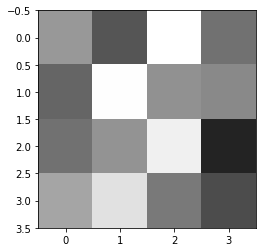

[[ 0.1024846  -0.2618303   0.67464846 -0.10993323]
 [-0.1735044   0.6661439   0.06643586  0.02347676]
 [-0.10874073  0.08210856  0.58684397 -0.5388707 ]
 [ 0.1765722   0.50509614 -0.06227864 -0.31322664]]


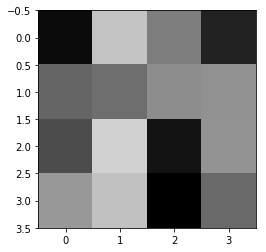

[[-0.41650409  0.6001803   0.2086129  -0.29114017]
 [ 0.07539588  0.12884255  0.2986678   0.31734353]
 [-0.06792034  0.67023975 -0.3736156   0.33184215]
 [ 0.35826632  0.58235186 -0.48131695  0.10122976]]


In [8]:
combined_data = np.array([model.get_weights()[0][:,:,0,0]+model.get_weights()[1][0],model.get_weights()[0][:,:,0,1]+model.get_weights()[1][1]])
    #Get the min and max of all your data
_min, _max = np.amin(combined_data), np.amax(combined_data)
print(_max,_min)  


print(model.get_weights()[0][:,:,0,0].shape)
plt.imshow((model.get_weights()[0][:,:,0,0]+model.get_weights()[1][0]),cmap='gray', vmin = _min, vmax = _max)
plt.show()
print(model.get_weights()[0][:,:,0,0])
plt.imshow((model.get_weights()[0][:,:,0,1]+model.get_weights()[1][1]),cmap='gray', vmin = _min, vmax = _max)
plt.show()
print(model.get_weights()[0][:,:,0,1])
